In [22]:
import sys

sys.path.append("../")

In [2]:
import torch
import pandas as pd
import numpy as np

from full_pipeline_main import generate_dataset
from models import SDCI
from utils import create_intervention_dataset, subset_interventions

In [3]:
import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [4]:
seed = 0
n, d = 100, 50
n_edges_per_d = 5
frac_interventions = 1.0

X_df, B_true, wandb_config_dict = generate_dataset(
    n, d, seed, frac_interventions, n_edges_per_d=n_edges_per_d
)
X_obs = X_df[X_df["perturbation_label"] == "obs"].loc[:, np.arange(d)].to_numpy()

In [5]:
X_df

,28,11,10,41,2,27,38,31,22,4,...,21,19,9,39,46,3,0,47,44,perturbation_label
0,-1.131878,-0.668550,0.637861,0.856095,-1.310928,0.597400,-1.330377,1.496293,-0.953974,-0.146177,...,0.264872,1.076563,-0.461905,1.155870,-1.031029,-0.203280,0.473027,0.758574,-0.131691,obs
1,-1.158483,1.427506,0.586534,-2.713493,0.005226,0.246915,-0.621413,1.295494,2.111949,-0.950280,...,0.627192,-0.520388,1.991495,-0.876933,0.290530,0.996067,1.524274,0.669273,-0.222533,obs
2,-0.253838,-0.991563,0.606338,2.007782,-0.387527,0.543110,0.006815,0.422589,-1.645041,-0.059376,...,-1.626611,0.868351,-0.321282,0.661184,-0.954574,0.168734,-1.038821,-0.612818,1.368928,obs
3,-0.437720,0.775322,0.657285,0.312580,0.285442,-0.032858,0.767112,-0.091394,-0.327218,1.585244,...,-0.586986,-0.012732,0.705358,-0.106824,-1.109579,-0.369812,-0.726960,0.062663,-1.370486,obs
4,0.848940,0.379466,-1.228701,0.247954,-0.040753,-0.279482,-0.189638,-0.702421,0.105489,0.327406,...,-1.193831,0.181123,-1.307384,-0.784006,0.105912,-1.175130,-0.639468,0.218194,1.031022,obs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,-0.167545,0.230976,0.790028,1.844550,-0.686278,0.900254,0.061177,0.061668,-1.377525,0.597895,...,-0.216626,0.403838,0.067887,0.583552,-0.417088,-0.168610,-0.219552,-0.642283,0.563870,49
10096,-1.244642,2.065744,0.733289,0.254695,-0.750123,0.490593,0.012262,1.189044,-0.777655,1.561495,...,1.908765,-1.051058,0.254809,1.358350,0.235535,-0.934016,1.904822,0.838952,-0.925845,49
10097,-1.339013,-1.498209,0.738740,0.251261,0.242481,-0.334862,1.298621,0.160729,-0.233899,2.338140,...,1.740219,-2.724448,0.457613,0.651461,-0.449956,-1.378570,1.441609,-0.022230,-2.570403,49
10098,1.602529,0.216228,-0.795651,-0.792543,-0.356473,0.335888,-1.579782,0.052280,0.764247,-0.397609,...,0.264037,0.118725,-0.253243,-0.331242,-0.109193,-0.264929,0.406344,0.181579,0.236623,49


In [6]:
import igraph as ig

In [7]:
G = ig.Graph.Adjacency(B_true.tolist())
ordered_vertices = G.topological_sorting()

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Topological rank')

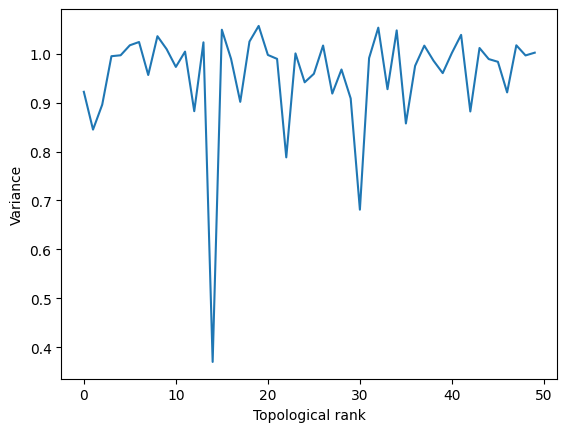

In [9]:
# topo sort
plt.plot(X_obs.var(axis=0)[ordered_vertices])
plt.ylabel("Variance")
plt.xlabel("Topological rank")

Text(0, 0.5, 'Variance(downstream_gene) - Variance(upstream_gene)')

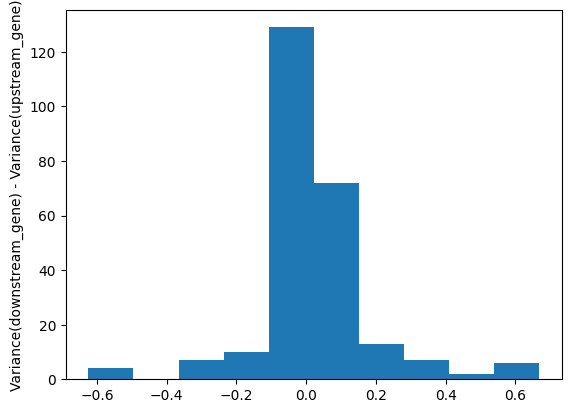

In [10]:
# plot distribution of var diff over true edges (pos means in favored dir)
variances = X_obs.var(axis=0)
var_diffs = []
for i, j in zip(*np.where(B_true)):
    var_diffs.append(variances[j] - variances[i])
plt.hist(var_diffs)
plt.ylabel("Variance(downstream_gene) - Variance(upstream_gene)")

In [11]:
# # Reversed noise scale
# seed = 0
# n, d = 100, 50
# n_edges_per_d = 5
# frac_interventions = 1.0

# X_df, B_true, wandb_config_dict = generate_dataset(
#     n, d, seed, frac_interventions, n_edges_per_d=n_edges_per_d, scale=lambda depth: ((d - depth + 1) / d * 100)
# )
# X_obs = X_df[X_df["perturbation_label"] == "obs"].loc[:, np.arange(d)].to_numpy()

In [12]:
# topo sort
# plt.plot(X_obs.var(axis=0)[ordered_vertices])
# plt.ylabel("Variance")
# plt.xlabel("Topological rank")

In [13]:
# plot distribution of var diff over true edges (pos means in favored dir)
# variances = X_obs.var(axis=0)
# var_diffs = []
# for i, j in zip(*np.where(B_true)):
#     var_diffs.append(variances[j] - variances[i])
# plt.hist(var_diffs)
# plt.ylabel("Variance(downstream_gene) - Variance(upstream_gene)")

In [16]:
# Try SDCI w/ varying perturbation fractions
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

metrics_df_records = []
for perturbation_frac in [0, 0.5, 1.0]:
    for mv_flavor in ["unit", "nn", "parameter"]:
        for standard_scale in [True, False]:
            for alpha_mult in [1, 0.1, .01, .001]:
                n_interventions = int(d * perturbation_frac)
                X_sub_df = subset_interventions(
                    X_df, n_interventions, maintain_dataset_size=True
                )
                dataset = create_intervention_dataset(X_sub_df, regime_format=False)

                model = SDCI(model_variance_flavor=mv_flavor, standard_scale=standard_scale)
                model.train(
                    dataset,
                    B_true=B_true,
                    device=device,
                    log_wandb=True,
                    wandb_project="SDCI_new_sim",
                    wandb_name=f"SDCI_pf-{perturbation_frac}_mv-{mv_flavor}_ss-{standard_scale}_alpham-{alpha_mult}",
                    wandb_config_dict={"model_variance_flavor": mv_flavor, "perturbation_frac": perturbation_frac},
                    verbose=False,
                    stage1_kwargs={"n_epochs": 1000, "alpha": 1e-2 * alpha_mult},
                    stage2_kwargs={"n_epochs": 1000, "alpha": 5e-3 * alpha_mult}
                )
                metrics_dict = model.compute_metrics(B_true)
                metrics_dict["model_variance_flavor"] = mv_flavor
                metrics_dict["standard_scale"] = standard_scale
                metrics_dict["alpha_mult"] = alpha_mult
                metrics_dict["mask_recall"] =  (B_true.astype(bool) & model._mask.astype(bool)).sum() / B_true.sum()
                metrics_dict["train_time"] = model._train_runtime_in_sec
                metrics_dict["n_interventions"] = n_interventions
                metrics_df_records.append(metrics_dict)


Using cuda:0


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=70.92, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=53.50, score=219, shd=219.0, gamma=0.00
Epoch 200: loss=53.08, score=213, shd=213.0, gamma=0.00
Epoch 300: loss=52.94, score=210, shd=210.0, gamma=0.00
Epoch 400: loss=52.90, score=210, shd=210.0, gamma=0.00
Epoch 500: loss=52.87, score=209, shd=209.0, gamma=0.00
Epoch 600: loss=52.86, score=208, shd=208.0, gamma=0.00
Epoch 700: loss=52.86, score=210, shd=210.0, gamma=0.00
Epoch 800: loss=52.86, score=209, shd=209.0, gamma=0.00
Epoch 900: loss=52.86, score=209, shd=209.0, gamma=0.00
Recall of mask: 0.488
Fraction of possible edges in mask: 0.0908
Epoch 0: loss=68.55, score=233, shd=233.0, gamma=0.00
Epoch 100: loss=61.48, score=219, shd=219.0, gamma=30.03
Epoch 200: loss=61.43, score=218, shd=218.0, gamma=30.03
Epoch 300: loss=61.40, score=223, shd=223.0, gamma=30.03
Epoch 400: loss=61.38, score=221, shd=221.0, gamma=30.03
Epoch 500: loss=61.39, score=219, shd=219.0, gamma=30.03
Epoch 600: loss=61.38, score=220, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▅█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▃▃▂▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▆█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.49, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=50.38, score=240, shd=240.0, gamma=0.00
Epoch 200: loss=50.34, score=236, shd=236.0, gamma=0.00
Epoch 300: loss=50.33, score=237, shd=237.0, gamma=0.00
Epoch 400: loss=50.32, score=234, shd=234.0, gamma=0.00
Epoch 500: loss=50.31, score=232, shd=232.0, gamma=0.00
Epoch 600: loss=50.31, score=234, shd=234.0, gamma=0.00
Epoch 700: loss=50.31, score=235, shd=235.0, gamma=0.00
Epoch 800: loss=50.31, score=234, shd=234.0, gamma=0.00
Epoch 900: loss=50.30, score=233, shd=233.0, gamma=0.00
Recall of mask: 0.644
Fraction of possible edges in mask: 0.1628
Epoch 0: loss=65.74, score=329, shd=329.0, gamma=0.00
Epoch 100: loss=60.09, score=242, shd=242.0, gamma=30.03
Epoch 200: loss=60.06, score=242, shd=242.0, gamma=30.03
Epoch 300: loss=60.07, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=60.07, score=239, shd=239.0, gamma=30.03
Epoch 500: loss=60.08, score=243, shd=243.0, gamma=30.03
Epoch 600: loss=60.07, score=239, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄██▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▃▃▃▃▃▃▄▄▄▁█████████
n_edges_pred,▁▅▅▆▅▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅▇███▇████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.03, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.64, score=273, shd=273.0, gamma=0.00
Epoch 200: loss=49.63, score=268, shd=268.0, gamma=0.00
Epoch 300: loss=49.63, score=274, shd=274.0, gamma=0.00
Epoch 400: loss=49.63, score=273, shd=273.0, gamma=0.00
Epoch 500: loss=49.63, score=275, shd=275.0, gamma=0.00
Epoch 600: loss=49.62, score=274, shd=274.0, gamma=0.00
Epoch 700: loss=49.62, score=275, shd=275.0, gamma=0.00
Epoch 800: loss=49.62, score=272, shd=272.0, gamma=0.00
Epoch 900: loss=49.62, score=272, shd=272.0, gamma=0.00
Recall of mask: 0.74
Fraction of possible edges in mask: 0.2216
Epoch 0: loss=65.27, score=407, shd=407.0, gamma=0.00
Epoch 100: loss=59.51, score=247, shd=247.0, gamma=30.03
Epoch 200: loss=59.51, score=245, shd=245.0, gamma=30.03
Epoch 300: loss=59.49, score=244, shd=244.0, gamma=30.03
Epoch 400: loss=59.47, score=244, shd=244.0, gamma=30.03
Epoch 500: loss=59.50, score=245, shd=245.0, gamma=30.03
Epoch 600: loss=59.49, score=245, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▃▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄▇▇██▇▇██▇


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.36, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.54, score=279, shd=279.0, gamma=0.00
Epoch 200: loss=49.53, score=273, shd=273.0, gamma=0.00
Epoch 300: loss=49.52, score=276, shd=276.0, gamma=0.00
Epoch 400: loss=49.53, score=275, shd=275.0, gamma=0.00
Epoch 500: loss=49.52, score=273, shd=273.0, gamma=0.00
Epoch 600: loss=49.52, score=278, shd=278.0, gamma=0.00
Epoch 700: loss=49.52, score=279, shd=279.0, gamma=0.00
Epoch 800: loss=49.52, score=273, shd=273.0, gamma=0.00
Epoch 900: loss=49.52, score=272, shd=272.0, gamma=0.00
Recall of mask: 0.772
Fraction of possible edges in mask: 0.2388
Epoch 0: loss=64.85, score=429, shd=429.0, gamma=0.00
Epoch 100: loss=59.34, score=245, shd=245.0, gamma=30.03
Epoch 200: loss=59.30, score=244, shd=244.0, gamma=30.03
Epoch 300: loss=59.31, score=245, shd=245.0, gamma=30.03
Epoch 400: loss=59.30, score=243, shd=243.0, gamma=30.03
Epoch 500: loss=59.30, score=246, shd=246.0, gamma=30.03
Epoch 600: loss=59.30, score=246, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄▇█▇█▇▇▇▆▇


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.34, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=53.26, score=219, shd=219.0, gamma=0.00
Epoch 200: loss=52.88, score=212, shd=212.0, gamma=0.00
Epoch 300: loss=52.73, score=209, shd=209.0, gamma=0.00
Epoch 400: loss=52.69, score=210, shd=210.0, gamma=0.00
Epoch 500: loss=52.67, score=210, shd=210.0, gamma=0.00
Epoch 600: loss=52.67, score=210, shd=210.0, gamma=0.00
Epoch 700: loss=52.67, score=209, shd=209.0, gamma=0.00
Epoch 800: loss=52.66, score=209, shd=209.0, gamma=0.00
Epoch 900: loss=52.66, score=209, shd=209.0, gamma=0.00
Recall of mask: 0.472
Fraction of possible edges in mask: 0.0868
Epoch 0: loss=67.65, score=232, shd=232.0, gamma=0.00
Epoch 100: loss=61.10, score=211, shd=211.0, gamma=30.03
Epoch 200: loss=61.03, score=208, shd=208.0, gamma=30.03
Epoch 300: loss=61.03, score=211, shd=211.0, gamma=30.03
Epoch 400: loss=61.01, score=214, shd=214.0, gamma=30.03
Epoch 500: loss=61.00, score=212, shd=212.0, gamma=30.03
Epoch 600: loss=61.00, score=211, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▅█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.21, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=50.24, score=241, shd=241.0, gamma=0.00
Epoch 200: loss=50.20, score=238, shd=238.0, gamma=0.00
Epoch 300: loss=50.19, score=238, shd=238.0, gamma=0.00
Epoch 400: loss=50.18, score=236, shd=236.0, gamma=0.00
Epoch 500: loss=50.17, score=235, shd=235.0, gamma=0.00
Epoch 600: loss=50.17, score=235, shd=235.0, gamma=0.00
Epoch 700: loss=50.16, score=233, shd=233.0, gamma=0.00
Epoch 800: loss=50.16, score=237, shd=237.0, gamma=0.00
Epoch 900: loss=50.16, score=235, shd=235.0, gamma=0.00
Recall of mask: 0.644
Fraction of possible edges in mask: 0.162
Epoch 0: loss=65.33, score=326, shd=326.0, gamma=0.00
Epoch 100: loss=59.76, score=243, shd=243.0, gamma=30.03
Epoch 200: loss=59.73, score=242, shd=242.0, gamma=30.03
Epoch 300: loss=59.72, score=243, shd=243.0, gamma=30.03
Epoch 400: loss=59.73, score=241, shd=241.0, gamma=30.03
Epoch 500: loss=59.72, score=243, shd=243.0, gamma=30.03
Epoch 600: loss=59.73, score=240, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄██▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▃▃▃▃▃▃▄▄▄▁█████████
n_edges_pred,▁▅▅▆▆▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅▇▇▇█▇█▇██


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.85, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.52, score=271, shd=271.0, gamma=0.00
Epoch 200: loss=49.50, score=271, shd=271.0, gamma=0.00
Epoch 300: loss=49.50, score=270, shd=270.0, gamma=0.00
Epoch 400: loss=49.50, score=267, shd=267.0, gamma=0.00
Epoch 500: loss=49.50, score=270, shd=270.0, gamma=0.00
Epoch 600: loss=49.50, score=269, shd=269.0, gamma=0.00
Epoch 700: loss=49.50, score=268, shd=268.0, gamma=0.00
Epoch 800: loss=49.50, score=270, shd=270.0, gamma=0.00
Epoch 900: loss=49.50, score=266, shd=266.0, gamma=0.00
Recall of mask: 0.716
Fraction of possible edges in mask: 0.2156
Epoch 0: loss=64.11, score=406, shd=406.0, gamma=0.00
Epoch 100: loss=59.25, score=248, shd=248.0, gamma=30.03
Epoch 200: loss=59.24, score=246, shd=246.0, gamma=30.03
Epoch 300: loss=59.21, score=246, shd=246.0, gamma=30.03
Epoch 400: loss=59.22, score=246, shd=246.0, gamma=30.03
Epoch 500: loss=59.22, score=246, shd=246.0, gamma=30.03
Epoch 600: loss=59.23, score=246, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▃▃▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▄▇██████▇█


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.68, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.42, score=281, shd=281.0, gamma=0.00
Epoch 200: loss=49.40, score=282, shd=282.0, gamma=0.00
Epoch 300: loss=49.40, score=283, shd=283.0, gamma=0.00
Epoch 400: loss=49.39, score=278, shd=278.0, gamma=0.00
Epoch 500: loss=49.40, score=276, shd=276.0, gamma=0.00
Epoch 600: loss=49.40, score=276, shd=276.0, gamma=0.00
Epoch 700: loss=49.40, score=274, shd=274.0, gamma=0.00
Epoch 800: loss=49.40, score=277, shd=277.0, gamma=0.00
Epoch 900: loss=49.40, score=273, shd=273.0, gamma=0.00
Recall of mask: 0.74
Fraction of possible edges in mask: 0.2312
Epoch 0: loss=64.35, score=425, shd=425.0, gamma=0.00
Epoch 100: loss=59.07, score=247, shd=247.0, gamma=30.03
Epoch 200: loss=59.04, score=249, shd=249.0, gamma=30.03
Epoch 300: loss=59.05, score=248, shd=248.0, gamma=30.03
Epoch 400: loss=59.06, score=249, shd=249.0, gamma=30.03
Epoch 500: loss=59.04, score=248, shd=248.0, gamma=30.03
Epoch 600: loss=59.05, score=248, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅█▇█▇▇▇▇██


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=71.76, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=3.37, score=228, shd=228.0, gamma=0.00
Epoch 200: loss=1.37, score=220, shd=220.0, gamma=0.00
Epoch 300: loss=0.59, score=195, shd=195.0, gamma=0.00
Epoch 400: loss=0.25, score=194, shd=194.0, gamma=0.00
Epoch 500: loss=-0.01, score=187, shd=187.0, gamma=0.00
Epoch 600: loss=-0.20, score=183, shd=183.0, gamma=0.00
Epoch 700: loss=-0.34, score=184, shd=184.0, gamma=0.00
Epoch 800: loss=-0.40, score=187, shd=187.0, gamma=0.00
Epoch 900: loss=-0.48, score=180, shd=180.0, gamma=0.00
Recall of mask: 0.94
Fraction of possible edges in mask: 0.2224
Epoch 0: loss=67.59, score=295, shd=295.0, gamma=0.00
Epoch 100: loss=26.81, score=198, shd=198.0, gamma=30.03
Epoch 200: loss=25.93, score=204, shd=204.0, gamma=30.03
Epoch 300: loss=25.80, score=205, shd=205.0, gamma=30.03
Epoch 400: loss=25.58, score=203, shd=203.0, gamma=30.03
Epoch 500: loss=25.57, score=206, shd=206.0, gamma=30.03
Epoch 600: loss=25.51, score=205, shd=205.0

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▅▅▅▆▆▆▆▆▁▇████████
n_edges_pred,▁██████████▃▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.81, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-8.12, score=755, shd=755.0, gamma=0.00
Epoch 200: loss=-10.28, score=838, shd=838.0, gamma=0.00
Epoch 300: loss=-11.05, score=861, shd=861.0, gamma=0.00
Epoch 400: loss=-11.59, score=879, shd=879.0, gamma=0.00
Epoch 500: loss=-11.93, score=879, shd=879.0, gamma=0.00
Epoch 600: loss=-12.06, score=879, shd=879.0, gamma=0.00
Epoch 700: loss=-12.17, score=876, shd=876.0, gamma=0.00
Epoch 800: loss=-12.29, score=886, shd=886.0, gamma=0.00
Epoch 900: loss=-12.48, score=889, shd=889.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.708
Epoch 0: loss=60.38, score=1123, shd=1123.0, gamma=0.00
Epoch 100: loss=23.09, score=236, shd=236.0, gamma=30.03
Epoch 200: loss=29.12, score=250, shd=250.0, gamma=60.06
Epoch 300: loss=28.79, score=250, shd=250.0, gamma=60.06
Epoch 400: loss=28.55, score=250, shd=250.0, gamma=60.06
Epoch 500: loss=28.35, score=251, shd=251.0, gamma=60.06
Epoch 600: loss=28.30, score=24

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▅▅▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁▅████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▆▇▇▇▇▇██▁▆▇███████
n_edges_pred,▁▇▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▄▄▃▃▃▃▃▃
precision,▁▄▃▃▃▃▃▃▃▃▃█▆▆▆▆▇▇▇▆


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.63, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-10.38, score=1094, shd=1094.0, gamma=0.00
Epoch 200: loss=-12.72, score=1188, shd=1188.0, gamma=0.00
Epoch 300: loss=-13.54, score=1247, shd=1247.0, gamma=0.00
Epoch 400: loss=-13.94, score=1292, shd=1292.0, gamma=0.00
Epoch 500: loss=-14.19, score=1311, shd=1311.0, gamma=0.00
Epoch 600: loss=-14.39, score=1330, shd=1330.0, gamma=0.00
Epoch 700: loss=-14.52, score=1342, shd=1342.0, gamma=0.00
Epoch 800: loss=-14.58, score=1341, shd=1341.0, gamma=0.00
Epoch 900: loss=-14.73, score=1348, shd=1348.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8896
Epoch 0: loss=5297255.20, score=1422, shd=1422.0, gamma=0.00
Epoch 100: loss=5297219.80, score=240, shd=240.0, gamma=30.03
Epoch 200: loss=5297218.30, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=5297218.55, score=241, shd=241.0, gamma=30.03
Epoch 400: loss=5297218.15, score=239, shd=239.0, gamma=30.03
Epoch 500: loss=5297217.75, score=239, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▇▇████████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂██▇██████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=70.72, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-10.58, score=1145, shd=1145.0, gamma=0.00
Epoch 200: loss=-12.86, score=1288, shd=1288.0, gamma=0.00
Epoch 400: loss=-14.23, score=1368, shd=1368.0, gamma=0.00
Epoch 500: loss=-14.54, score=1386, shd=1386.0, gamma=0.00
Epoch 600: loss=-14.70, score=1400, shd=1400.0, gamma=0.00
Epoch 700: loss=-14.88, score=1410, shd=1410.0, gamma=0.00
Epoch 800: loss=-14.97, score=1427, shd=1427.0, gamma=0.00
Epoch 900: loss=-15.05, score=1428, shd=1428.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.9036
Epoch 0: loss=58.63, score=1480, shd=1480.0, gamma=0.00
Epoch 100: loss=23.07, score=241, shd=241.0, gamma=30.03
Epoch 200: loss=22.69, score=240, shd=240.0, gamma=30.03
Epoch 300: loss=21.39, score=241, shd=241.0, gamma=30.03
Epoch 400: loss=21.28, score=242, shd=242.0, gamma=30.03
Epoch 500: loss=21.50, score=240, shd=240.0, gamma=30.03
Epoch 600: loss=21.19, score=240, shd=240.0, gamma=30.03
Epoch 700: lo

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▂▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇████████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=70.69, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=2.11, score=232, shd=232.0, gamma=0.00
Epoch 200: loss=0.05, score=207, shd=207.0, gamma=0.00
Epoch 300: loss=-0.69, score=196, shd=196.0, gamma=0.00
Epoch 400: loss=-1.08, score=187, shd=187.0, gamma=0.00
Epoch 500: loss=-1.34, score=179, shd=179.0, gamma=0.00
Epoch 600: loss=-1.58, score=175, shd=175.0, gamma=0.00
Epoch 700: loss=-1.64, score=177, shd=177.0, gamma=0.00
Epoch 800: loss=-1.73, score=178, shd=178.0, gamma=0.00
Epoch 900: loss=-1.80, score=179, shd=179.0, gamma=0.00
Recall of mask: 0.952
Fraction of possible edges in mask: 0.2292
Epoch 0: loss=66.59, score=297, shd=297.0, gamma=0.00
Epoch 100: loss=25.26, score=201, shd=201.0, gamma=30.03
Epoch 200: loss=24.53, score=207, shd=207.0, gamma=30.03
Epoch 300: loss=24.17, score=207, shd=207.0, gamma=30.03
Epoch 400: loss=24.20, score=206, shd=206.0, gamma=30.03
Epoch 500: loss=24.19, score=206, shd=206.0, gamma=30.03
Epoch 600: loss=24.18, score=207, shd=20

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▃▃▃
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂███████▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▄▅▅▅▆▆▆▆▆▁▇████████
n_edges_pred,▁██████████▃▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.09, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-9.22, score=771, shd=771.0, gamma=0.00
Epoch 200: loss=-11.30, score=880, shd=880.0, gamma=0.00
Epoch 300: loss=-12.30, score=902, shd=902.0, gamma=0.00
Epoch 400: loss=-12.80, score=899, shd=899.0, gamma=0.00
Epoch 500: loss=-13.07, score=900, shd=900.0, gamma=0.00
Epoch 600: loss=-13.31, score=905, shd=905.0, gamma=0.00
Epoch 700: loss=-13.44, score=912, shd=912.0, gamma=0.00
Epoch 800: loss=-13.52, score=918, shd=918.0, gamma=0.00
Epoch 900: loss=-13.64, score=912, shd=912.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.7236
Epoch 0: loss=58.82, score=1160, shd=1160.0, gamma=0.00
Epoch 100: loss=21.87, score=236, shd=236.0, gamma=30.03
Epoch 200: loss=20.70, score=236, shd=236.0, gamma=30.03
Epoch 300: loss=20.43, score=236, shd=236.0, gamma=30.03
Epoch 400: loss=20.13, score=236, shd=236.0, gamma=30.03
Epoch 500: loss=20.19, score=236, shd=236.0, gamma=30.03
Epoch 600: loss=20.23, score=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▆▆▇▇▇▇▇▇▇
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.46, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-11.47, score=1099, shd=1099.0, gamma=0.00
Epoch 200: loss=-13.76, score=1221, shd=1221.0, gamma=0.00
Epoch 300: loss=-14.62, score=1294, shd=1294.0, gamma=0.00
Epoch 400: loss=-15.12, score=1311, shd=1311.0, gamma=0.00
Epoch 500: loss=-15.40, score=1352, shd=1352.0, gamma=0.00
Epoch 600: loss=-15.64, score=1362, shd=1362.0, gamma=0.00
Epoch 700: loss=-15.81, score=1364, shd=1364.0, gamma=0.00
Epoch 800: loss=-15.93, score=1376, shd=1376.0, gamma=0.00
Epoch 900: loss=-16.06, score=1376, shd=1376.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8904
Epoch 0: loss=6422944.45, score=1444, shd=1444.0, gamma=0.00
Epoch 100: loss=6422908.40, score=238, shd=238.0, gamma=30.03
Epoch 200: loss=6422906.95, score=240, shd=240.0, gamma=30.03
Epoch 300: loss=6422906.20, score=240, shd=240.0, gamma=30.03
Epoch 400: loss=6422906.40, score=241, shd=241.0, gamma=30.03
Epoch 500: loss=6422906.65, score=240, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▇▇████████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂███▇█████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.20, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-11.87, score=1141, shd=1141.0, gamma=0.00
Epoch 200: loss=-14.25, score=1288, shd=1288.0, gamma=0.00
Epoch 300: loss=-15.14, score=1340, shd=1340.0, gamma=0.00
Epoch 400: loss=-15.54, score=1375, shd=1375.0, gamma=0.00
Epoch 500: loss=-15.88, score=1394, shd=1394.0, gamma=0.00
Epoch 600: loss=-16.04, score=1422, shd=1422.0, gamma=0.00
Epoch 700: loss=-16.13, score=1428, shd=1428.0, gamma=0.00
Epoch 800: loss=-16.28, score=1440, shd=1440.0, gamma=0.00
Epoch 900: loss=-16.32, score=1443, shd=1443.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8976
Epoch 0: loss=4718803.45, score=1461, shd=1461.0, gamma=0.00
Epoch 100: loss=4718766.60, score=239, shd=239.0, gamma=30.03
Epoch 200: loss=4718765.80, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=4718765.80, score=240, shd=240.0, gamma=30.03
Epoch 400: loss=4718764.95, score=242, shd=242.0, gamma=30.03
Epoch 500: loss=4718764.85, score=239, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▇▇████████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=71.27, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=6.33, score=195, shd=195.0, gamma=0.00
Epoch 200: loss=3.15, score=208, shd=208.0, gamma=0.00
Epoch 300: loss=2.56, score=196, shd=196.0, gamma=0.00
Epoch 400: loss=2.25, score=186, shd=186.0, gamma=0.00
Epoch 500: loss=2.01, score=184, shd=184.0, gamma=0.00
Epoch 600: loss=1.93, score=183, shd=183.0, gamma=0.00
Epoch 700: loss=1.84, score=181, shd=181.0, gamma=0.00
Epoch 800: loss=1.74, score=180, shd=180.0, gamma=0.00
Epoch 900: loss=1.73, score=178, shd=178.0, gamma=0.00
Recall of mask: 0.948
Fraction of possible edges in mask: 0.2252
Epoch 0: loss=66.95, score=305, shd=305.0, gamma=0.00
Epoch 100: loss=28.22, score=203, shd=203.0, gamma=30.03
Epoch 200: loss=27.50, score=207, shd=207.0, gamma=30.03
Epoch 300: loss=27.27, score=206, shd=206.0, gamma=30.03
Epoch 400: loss=27.15, score=206, shd=206.0, gamma=30.03
Epoch 500: loss=27.21, score=208, shd=208.0, gamma=30.03
Epoch 600: loss=27.22, score=210, shd=210.0, ga

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▂▂▂▂▂▂▂▂▂
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.90, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.03, score=537, shd=537.0, gamma=0.00
Epoch 200: loss=-7.82, score=725, shd=725.0, gamma=0.00
Epoch 300: loss=-8.65, score=806, shd=806.0, gamma=0.00
Epoch 400: loss=-9.02, score=824, shd=824.0, gamma=0.00
Epoch 500: loss=-9.20, score=832, shd=832.0, gamma=0.00
Epoch 600: loss=-9.39, score=843, shd=843.0, gamma=0.00
Epoch 700: loss=-9.53, score=840, shd=840.0, gamma=0.00
Epoch 800: loss=-9.66, score=858, shd=858.0, gamma=0.00
Epoch 900: loss=-9.73, score=859, shd=859.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6952
Epoch 0: loss=59.44, score=1106, shd=1106.0, gamma=0.00
Epoch 100: loss=24.00, score=238, shd=238.0, gamma=30.03
Epoch 200: loss=23.48, score=237, shd=237.0, gamma=30.03
Epoch 300: loss=23.04, score=237, shd=237.0, gamma=30.03
Epoch 400: loss=23.17, score=237, shd=237.0, gamma=30.03
Epoch 500: loss=22.94, score=237, shd=237.0, gamma=30.03
Epoch 600: loss=22.81, score=235, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▆▆▇▇▇▇▇▇▇
n_edges_pred,▁▅▆▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▄▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.05, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-6.69, score=870, shd=870.0, gamma=0.00
Epoch 200: loss=-10.43, score=1135, shd=1135.0, gamma=0.00
Epoch 300: loss=-11.22, score=1213, shd=1213.0, gamma=0.00
Epoch 400: loss=-11.60, score=1269, shd=1269.0, gamma=0.00
Epoch 500: loss=-11.72, score=1301, shd=1301.0, gamma=0.00
Epoch 600: loss=-11.85, score=1321, shd=1321.0, gamma=0.00
Epoch 700: loss=-11.96, score=1343, shd=1343.0, gamma=0.00
Epoch 800: loss=-12.08, score=1338, shd=1338.0, gamma=0.00
Epoch 900: loss=-12.24, score=1344, shd=1344.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.888
Epoch 0: loss=58.62, score=1473, shd=1473.0, gamma=0.00
Epoch 100: loss=23.90, score=239, shd=239.0, gamma=30.03
Epoch 200: loss=23.08, score=240, shd=240.0, gamma=30.03
Epoch 300: loss=22.58, score=240, shd=240.0, gamma=30.03
Epoch 400: loss=22.48, score=240, shd=240.0, gamma=30.03
Epoch 500: loss=22.46, score=239, shd=239.0, gamma=30.03
Epoch 600: loss

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇██████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.85, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-6.89, score=909, shd=909.0, gamma=0.00
Epoch 200: loss=-10.63, score=1215, shd=1215.0, gamma=0.00
Epoch 300: loss=-11.46, score=1311, shd=1311.0, gamma=0.00
Epoch 400: loss=-11.79, score=1340, shd=1340.0, gamma=0.00
Epoch 500: loss=-11.99, score=1382, shd=1382.0, gamma=0.00
Epoch 600: loss=-12.16, score=1392, shd=1392.0, gamma=0.00
Epoch 700: loss=-12.27, score=1412, shd=1412.0, gamma=0.00
Epoch 800: loss=-12.38, score=1421, shd=1421.0, gamma=0.00
Epoch 900: loss=-12.43, score=1436, shd=1436.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.906
Epoch 0: loss=57.44, score=1502, shd=1502.0, gamma=0.00
Epoch 100: loss=24.37, score=241, shd=241.0, gamma=30.03
Epoch 200: loss=22.86, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=22.54, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=22.65, score=241, shd=241.0, gamma=30.03
Epoch 500: loss=22.33, score=239, shd=239.0, gamma=30.03
Epoch 600: loss

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇███████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▂▂▂▇████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.48, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=5.01, score=199, shd=199.0, gamma=0.00
Epoch 200: loss=2.03, score=201, shd=201.0, gamma=0.00
Epoch 300: loss=1.33, score=186, shd=186.0, gamma=0.00
Epoch 400: loss=1.01, score=186, shd=186.0, gamma=0.00
Epoch 500: loss=0.85, score=185, shd=185.0, gamma=0.00
Epoch 600: loss=0.78, score=177, shd=177.0, gamma=0.00
Epoch 700: loss=0.69, score=180, shd=180.0, gamma=0.00
Epoch 800: loss=0.66, score=182, shd=182.0, gamma=0.00
Epoch 900: loss=0.59, score=183, shd=183.0, gamma=0.00
Recall of mask: 0.932
Fraction of possible edges in mask: 0.222
Epoch 0: loss=65.79, score=299, shd=299.0, gamma=0.00
Epoch 100: loss=26.91, score=204, shd=204.0, gamma=30.03
Epoch 200: loss=26.21, score=203, shd=203.0, gamma=30.03
Epoch 300: loss=25.94, score=204, shd=204.0, gamma=30.03
Epoch 400: loss=26.11, score=205, shd=205.0, gamma=30.03
Epoch 500: loss=25.99, score=207, shd=207.0, gamma=30.03
Epoch 600: loss=25.93, score=206, shd=206.0, gam

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▂▂▂▂▂▂▂▂▂
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.75, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.99, score=549, shd=549.0, gamma=0.00
Epoch 200: loss=-8.89, score=734, shd=734.0, gamma=0.00
Epoch 300: loss=-9.71, score=808, shd=808.0, gamma=0.00
Epoch 400: loss=-10.22, score=840, shd=840.0, gamma=0.00
Epoch 500: loss=-10.43, score=845, shd=845.0, gamma=0.00
Epoch 600: loss=-10.58, score=851, shd=851.0, gamma=0.00
Epoch 700: loss=-10.70, score=863, shd=863.0, gamma=0.00
Epoch 800: loss=-10.78, score=862, shd=862.0, gamma=0.00
Epoch 900: loss=-10.93, score=878, shd=878.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6988
Epoch 0: loss=59.42, score=1135, shd=1135.0, gamma=0.00
Epoch 100: loss=22.62, score=239, shd=239.0, gamma=30.03
Epoch 200: loss=22.00, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=21.55, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=21.50, score=237, shd=237.0, gamma=30.03
Epoch 500: loss=21.62, score=239, shd=239.0, gamma=30.03
Epoch 600: loss=21.20, score=239

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▆▆▆▇▇▇▇▇▇
n_edges_pred,▁▅▆▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▄▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.34, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-7.85, score=854, shd=854.0, gamma=0.00
Epoch 200: loss=-11.62, score=1126, shd=1126.0, gamma=0.00
Epoch 300: loss=-12.44, score=1205, shd=1205.0, gamma=0.00
Epoch 400: loss=-12.76, score=1256, shd=1256.0, gamma=0.00
Epoch 500: loss=-13.00, score=1292, shd=1292.0, gamma=0.00
Epoch 600: loss=-13.22, score=1311, shd=1311.0, gamma=0.00
Epoch 700: loss=-13.31, score=1317, shd=1317.0, gamma=0.00
Epoch 800: loss=-13.40, score=1339, shd=1339.0, gamma=0.00
Epoch 900: loss=-13.43, score=1343, shd=1343.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8936
Epoch 0: loss=56.36, score=1475, shd=1475.0, gamma=0.00
Epoch 100: loss=22.62, score=240, shd=240.0, gamma=30.03
Epoch 200: loss=21.62, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=21.31, score=240, shd=240.0, gamma=30.03
Epoch 400: loss=20.92, score=241, shd=241.0, gamma=30.03
Epoch 500: loss=21.23, score=240, shd=240.0, gamma=30.03
Epoch 600: los

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇██████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.33, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-7.97, score=896, shd=896.0, gamma=0.00
Epoch 200: loss=-11.68, score=1197, shd=1197.0, gamma=0.00
Epoch 300: loss=-12.55, score=1284, shd=1284.0, gamma=0.00
Epoch 400: loss=-12.98, score=1338, shd=1338.0, gamma=0.00
Epoch 500: loss=-13.14, score=1385, shd=1385.0, gamma=0.00
Epoch 600: loss=-13.35, score=1409, shd=1409.0, gamma=0.00
Epoch 700: loss=-13.52, score=1430, shd=1430.0, gamma=0.00
Epoch 800: loss=-13.54, score=1420, shd=1420.0, gamma=0.00
Epoch 900: loss=-13.64, score=1418, shd=1418.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.9016
Epoch 0: loss=56.57, score=1485, shd=1485.0, gamma=0.00
Epoch 100: loss=22.60, score=238, shd=238.0, gamma=30.03
Epoch 200: loss=21.89, score=239, shd=239.0, gamma=30.03
Epoch 300: loss=21.77, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=21.14, score=238, shd=238.0, gamma=30.03
Epoch 500: loss=21.07, score=238, shd=238.0, gamma=30.03
Epoch 600: los

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇███████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▂▂▂▂▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.84, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=53.23, score=210, shd=210.0, gamma=0.00
Epoch 200: loss=52.81, score=209, shd=209.0, gamma=0.00
Epoch 300: loss=52.69, score=204, shd=204.0, gamma=0.00
Epoch 400: loss=52.63, score=203, shd=203.0, gamma=0.00
Epoch 500: loss=52.62, score=204, shd=204.0, gamma=0.00
Epoch 600: loss=52.61, score=204, shd=204.0, gamma=0.00
Epoch 700: loss=52.60, score=204, shd=204.0, gamma=0.00
Epoch 800: loss=52.60, score=204, shd=204.0, gamma=0.00
Epoch 900: loss=52.60, score=204, shd=204.0, gamma=0.00
Recall of mask: 0.54
Fraction of possible edges in mask: 0.0872
Epoch 0: loss=5341848.40, score=205, shd=205.0, gamma=0.00
Epoch 100: loss=5341842.25, score=210, shd=210.0, gamma=30.03
Epoch 200: loss=5341841.85, score=211, shd=211.0, gamma=30.03
Epoch 300: loss=5341841.80, score=209, shd=209.0, gamma=30.03
Epoch 400: loss=5341841.85, score=211, shd=211.0, gamma=30.03
Epoch 500: loss=5341842.00, score=210, shd=210.0, gamma=30.03
Epoch 600

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▅█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▆▆▇▇▇▇▇▇▇█▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▆█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.52, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=50.09, score=223, shd=223.0, gamma=0.00
Epoch 200: loss=50.05, score=218, shd=218.0, gamma=0.00
Epoch 300: loss=50.04, score=216, shd=216.0, gamma=0.00
Epoch 400: loss=50.03, score=217, shd=217.0, gamma=0.00
Epoch 500: loss=50.02, score=218, shd=218.0, gamma=0.00
Epoch 600: loss=50.02, score=215, shd=215.0, gamma=0.00
Epoch 700: loss=50.02, score=212, shd=212.0, gamma=0.00
Epoch 800: loss=50.01, score=215, shd=215.0, gamma=0.00
Epoch 900: loss=50.02, score=214, shd=214.0, gamma=0.00
Recall of mask: 0.672
Fraction of possible edges in mask: 0.1544
Epoch 0: loss=65.52, score=290, shd=290.0, gamma=0.00
Epoch 100: loss=59.84, score=230, shd=230.0, gamma=30.03
Epoch 200: loss=59.81, score=233, shd=233.0, gamma=30.03
Epoch 300: loss=59.82, score=227, shd=227.0, gamma=30.03
Epoch 400: loss=59.80, score=231, shd=231.0, gamma=30.03
Epoch 500: loss=59.80, score=228, shd=228.0, gamma=30.03
Epoch 600: loss=59.80, score=229, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄██▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▃▃▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▂▁▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.13, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.31, score=250, shd=250.0, gamma=0.00
Epoch 200: loss=49.30, score=244, shd=244.0, gamma=0.00
Epoch 300: loss=49.30, score=245, shd=245.0, gamma=0.00
Epoch 400: loss=49.30, score=248, shd=248.0, gamma=0.00
Epoch 600: loss=49.29, score=244, shd=244.0, gamma=0.00
Epoch 700: loss=49.29, score=246, shd=246.0, gamma=0.00
Epoch 800: loss=49.29, score=243, shd=243.0, gamma=0.00
Epoch 900: loss=49.29, score=246, shd=246.0, gamma=0.00
Recall of mask: 0.764
Fraction of possible edges in mask: 0.2104
Epoch 0: loss=5569079.30, score=370, shd=370.0, gamma=0.00
Epoch 100: loss=5569074.20, score=239, shd=239.0, gamma=30.03
Epoch 200: loss=5569074.00, score=238, shd=238.0, gamma=30.03
Epoch 300: loss=5569074.05, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=5569074.05, score=242, shd=242.0, gamma=30.03
Epoch 500: loss=5569074.15, score=240, shd=240.0, gamma=30.03
Epoch 600: loss=5569074.05, score=242, shd=242.0, gamma=30.03
Ep

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄███▇█▇▇██


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.86, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.35, score=252, shd=252.0, gamma=0.00
Epoch 200: loss=49.34, score=253, shd=253.0, gamma=0.00
Epoch 300: loss=49.34, score=250, shd=250.0, gamma=0.00
Epoch 400: loss=49.34, score=249, shd=249.0, gamma=0.00
Epoch 500: loss=49.33, score=249, shd=249.0, gamma=0.00
Epoch 600: loss=49.33, score=249, shd=249.0, gamma=0.00
Epoch 700: loss=49.33, score=249, shd=249.0, gamma=0.00
Epoch 800: loss=49.33, score=248, shd=248.0, gamma=0.00
Epoch 900: loss=49.33, score=249, shd=249.0, gamma=0.00
Recall of mask: 0.772
Fraction of possible edges in mask: 0.224
Epoch 0: loss=64.42, score=400, shd=400.0, gamma=0.00
Epoch 100: loss=59.36, score=239, shd=239.0, gamma=30.03
Epoch 200: loss=59.33, score=238, shd=238.0, gamma=30.03
Epoch 300: loss=59.32, score=239, shd=239.0, gamma=30.03
Epoch 400: loss=59.36, score=237, shd=237.0, gamma=30.03
Epoch 500: loss=59.34, score=238, shd=238.0, gamma=30.03
Epoch 600: loss=59.33, score=240, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄▇█▇██▇███


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.32, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=53.18, score=203, shd=203.0, gamma=0.00
Epoch 200: loss=52.78, score=196, shd=196.0, gamma=0.00
Epoch 300: loss=52.63, score=192, shd=192.0, gamma=0.00
Epoch 400: loss=52.57, score=193, shd=193.0, gamma=0.00
Epoch 500: loss=52.56, score=194, shd=194.0, gamma=0.00
Epoch 600: loss=52.56, score=195, shd=195.0, gamma=0.00
Epoch 700: loss=52.56, score=195, shd=195.0, gamma=0.00
Epoch 800: loss=52.56, score=195, shd=195.0, gamma=0.00
Epoch 900: loss=52.55, score=195, shd=195.0, gamma=0.00
Recall of mask: 0.532
Fraction of possible edges in mask: 0.0888
Epoch 0: loss=67.36, score=210, shd=210.0, gamma=0.00
Epoch 100: loss=61.30, score=221, shd=221.0, gamma=30.03
Epoch 200: loss=61.26, score=217, shd=217.0, gamma=30.03
Epoch 300: loss=61.23, score=220, shd=220.0, gamma=30.03
Epoch 400: loss=61.23, score=221, shd=221.0, gamma=30.03
Epoch 500: loss=61.22, score=222, shd=222.0, gamma=30.03
Epoch 600: loss=61.21, score=219, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▅█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▅▅▅▅▅▅▅▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▂▃▂▂▂▂▃▂▂
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▆█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.04, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=50.05, score=215, shd=215.0, gamma=0.00
Epoch 200: loss=50.01, score=214, shd=214.0, gamma=0.00
Epoch 300: loss=49.99, score=209, shd=209.0, gamma=0.00
Epoch 400: loss=49.98, score=211, shd=211.0, gamma=0.00
Epoch 500: loss=49.98, score=209, shd=209.0, gamma=0.00
Epoch 600: loss=49.97, score=206, shd=206.0, gamma=0.00
Epoch 700: loss=49.97, score=206, shd=206.0, gamma=0.00
Epoch 800: loss=49.97, score=210, shd=210.0, gamma=0.00
Epoch 900: loss=49.96, score=209, shd=209.0, gamma=0.00
Recall of mask: 0.692
Fraction of possible edges in mask: 0.1548
Epoch 0: loss=65.35, score=286, shd=286.0, gamma=0.00
Epoch 100: loss=59.73, score=231, shd=231.0, gamma=30.03
Epoch 200: loss=59.73, score=233, shd=233.0, gamma=30.03
Epoch 300: loss=59.70, score=235, shd=235.0, gamma=30.03
Epoch 400: loss=59.69, score=236, shd=236.0, gamma=30.03
Epoch 500: loss=59.72, score=236, shd=236.0, gamma=30.03
Epoch 600: loss=59.71, score=233, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄██▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▃▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▆▆▆▆▆▆▆▆█▂▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.71, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.31, score=231, shd=231.0, gamma=0.00
Epoch 200: loss=49.29, score=232, shd=232.0, gamma=0.00
Epoch 300: loss=49.29, score=229, shd=229.0, gamma=0.00
Epoch 400: loss=49.29, score=230, shd=230.0, gamma=0.00
Epoch 500: loss=49.29, score=229, shd=229.0, gamma=0.00
Epoch 700: loss=49.29, score=228, shd=228.0, gamma=0.00
Epoch 800: loss=49.29, score=227, shd=227.0, gamma=0.00
Epoch 900: loss=49.29, score=227, shd=227.0, gamma=0.00
Recall of mask: 0.768
Fraction of possible edges in mask: 0.2052
Epoch 0: loss=64.12, score=366, shd=366.0, gamma=0.00
Epoch 100: loss=59.38, score=242, shd=242.0, gamma=30.03
Epoch 200: loss=59.34, score=242, shd=242.0, gamma=30.03
Epoch 300: loss=59.36, score=243, shd=243.0, gamma=30.03
Epoch 400: loss=59.34, score=241, shd=241.0, gamma=30.03
Epoch 500: loss=59.35, score=242, shd=242.0, gamma=30.03
Epoch 600: loss=59.35, score=243, shd=243.0, gamma=30.03
Epoch 700: loss=59.35, score=244, shd

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▄██▇███▇▇█


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.04, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.29, score=251, shd=251.0, gamma=0.00
Epoch 200: loss=49.28, score=247, shd=247.0, gamma=0.00
Epoch 300: loss=49.28, score=244, shd=244.0, gamma=0.00
Epoch 400: loss=49.28, score=245, shd=245.0, gamma=0.00
Epoch 500: loss=49.28, score=242, shd=242.0, gamma=0.00
Epoch 600: loss=49.28, score=245, shd=245.0, gamma=0.00
Epoch 700: loss=49.28, score=241, shd=241.0, gamma=0.00
Epoch 800: loss=49.28, score=243, shd=243.0, gamma=0.00
Epoch 900: loss=49.28, score=245, shd=245.0, gamma=0.00
Recall of mask: 0.8
Fraction of possible edges in mask: 0.2224
Epoch 0: loss=5538188.65, score=371, shd=371.0, gamma=0.00
Epoch 100: loss=5538183.95, score=241, shd=241.0, gamma=30.03
Epoch 200: loss=5538183.90, score=242, shd=242.0, gamma=30.03
Epoch 300: loss=5538183.85, score=244, shd=244.0, gamma=30.03
Epoch 400: loss=5538183.80, score=242, shd=242.0, gamma=30.03
Epoch 500: loss=5538183.90, score=242, shd=242.0, gamma=30.03
Epoch 600:

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▅▅▅▅▅▆▅▅▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄▇▇▇▇▇██▇▇


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.97, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=5.43, score=178, shd=178.0, gamma=0.00
Epoch 200: loss=3.29, score=169, shd=169.0, gamma=0.00
Epoch 300: loss=2.58, score=168, shd=168.0, gamma=0.00
Epoch 400: loss=2.29, score=168, shd=168.0, gamma=0.00
Epoch 500: loss=2.12, score=162, shd=162.0, gamma=0.00
Epoch 600: loss=1.98, score=161, shd=161.0, gamma=0.00
Epoch 700: loss=1.82, score=160, shd=160.0, gamma=0.00
Epoch 800: loss=1.75, score=162, shd=162.0, gamma=0.00
Epoch 900: loss=1.70, score=160, shd=160.0, gamma=0.00
Recall of mask: 0.928
Fraction of possible edges in mask: 0.1968
Epoch 0: loss=66.20, score=264, shd=264.0, gamma=0.00
Epoch 100: loss=28.10, score=174, shd=174.0, gamma=30.03
Epoch 200: loss=35.02, score=210, shd=210.0, gamma=60.06
Epoch 300: loss=34.55, score=218, shd=218.0, gamma=60.06
Epoch 400: loss=34.52, score=219, shd=219.0, gamma=60.06
Epoch 500: loss=34.50, score=220, shd=220.0, gamma=60.06
Epoch 600: loss=34.46, score=219, shd=219.0, ga

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁▅████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▅▅▅▅▅▅▁▆▇███████
n_edges_pred,▁██████████▃▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.31, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.86, score=654, shd=654.0, gamma=0.00
Epoch 200: loss=-7.05, score=683, shd=683.0, gamma=0.00
Epoch 300: loss=-7.92, score=724, shd=724.0, gamma=0.00
Epoch 400: loss=-8.36, score=734, shd=734.0, gamma=0.00
Epoch 500: loss=-8.63, score=738, shd=738.0, gamma=0.00
Epoch 600: loss=-8.78, score=734, shd=734.0, gamma=0.00
Epoch 700: loss=-8.96, score=732, shd=732.0, gamma=0.00
Epoch 800: loss=-9.16, score=729, shd=729.0, gamma=0.00
Epoch 900: loss=-9.26, score=728, shd=728.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6484
Epoch 0: loss=60.31, score=1037, shd=1037.0, gamma=0.00
Epoch 100: loss=25.55, score=226, shd=226.0, gamma=30.03
Epoch 200: loss=24.42, score=224, shd=224.0, gamma=30.03
Epoch 300: loss=24.28, score=219, shd=219.0, gamma=30.03
Epoch 400: loss=23.67, score=222, shd=222.0, gamma=30.03
Epoch 500: loss=24.13, score=221, shd=221.0, gamma=30.03
Epoch 600: loss=23.88, score=222, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▆▇▇▇▇▇▇▇▇
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.23, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-7.38, score=987, shd=987.0, gamma=0.00
Epoch 200: loss=-9.70, score=1079, shd=1079.0, gamma=0.00
Epoch 400: loss=-11.21, score=1165, shd=1165.0, gamma=0.00
Epoch 500: loss=-11.45, score=1181, shd=1181.0, gamma=0.00
Epoch 600: loss=-11.72, score=1190, shd=1190.0, gamma=0.00
Epoch 700: loss=-11.83, score=1195, shd=1195.0, gamma=0.00
Epoch 800: loss=-11.96, score=1204, shd=1204.0, gamma=0.00
Epoch 900: loss=-12.00, score=1198, shd=1198.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8744
Epoch 0: loss=58.18, score=1358, shd=1358.0, gamma=0.00
Epoch 100: loss=25.78, score=235, shd=235.0, gamma=30.03
Epoch 200: loss=24.78, score=235, shd=235.0, gamma=30.03
Epoch 300: loss=24.94, score=234, shd=234.0, gamma=30.03
Epoch 400: loss=24.68, score=235, shd=235.0, gamma=30.03
Epoch 500: loss=24.17, score=234, shd=234.0, gamma=30.03
Epoch 600: loss=24.23, score=234, shd=234.0, gamma=30.03
Epoch 700: loss=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇▇███████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.51, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-6.72, score=1046, shd=1046.0, gamma=0.00
Epoch 200: loss=-9.18, score=1160, shd=1160.0, gamma=0.00
Epoch 300: loss=-10.05, score=1207, shd=1207.0, gamma=0.00
Epoch 400: loss=-10.48, score=1232, shd=1232.0, gamma=0.00
Epoch 500: loss=-10.79, score=1259, shd=1259.0, gamma=0.00
Epoch 600: loss=-11.01, score=1250, shd=1250.0, gamma=0.00
Epoch 700: loss=-11.06, score=1260, shd=1260.0, gamma=0.00
Epoch 800: loss=-11.19, score=1268, shd=1268.0, gamma=0.00
Epoch 900: loss=-11.25, score=1280, shd=1280.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8904
Epoch 0: loss=58.16, score=1432, shd=1432.0, gamma=0.00
Epoch 100: loss=26.28, score=237, shd=237.0, gamma=30.03
Epoch 200: loss=25.27, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=25.12, score=233, shd=233.0, gamma=30.03
Epoch 400: loss=24.71, score=233, shd=233.0, gamma=30.03
Epoch 500: loss=24.48, score=234, shd=234.0, gamma=30.03
Epoch 600: lo

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇▇███████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂▇████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=70.53, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=6.26, score=182, shd=182.0, gamma=0.00
Epoch 200: loss=4.29, score=158, shd=158.0, gamma=0.00
Epoch 300: loss=3.60, score=158, shd=158.0, gamma=0.00
Epoch 400: loss=3.22, score=162, shd=162.0, gamma=0.00
Epoch 500: loss=3.01, score=158, shd=158.0, gamma=0.00
Epoch 600: loss=2.79, score=152, shd=152.0, gamma=0.00
Epoch 700: loss=2.64, score=159, shd=159.0, gamma=0.00
Epoch 800: loss=2.59, score=157, shd=157.0, gamma=0.00
Epoch 900: loss=2.54, score=157, shd=157.0, gamma=0.00
Recall of mask: 0.94
Fraction of possible edges in mask: 0.1924
Epoch 0: loss=66.88, score=242, shd=242.0, gamma=0.00
Epoch 100: loss=29.11, score=179, shd=179.0, gamma=30.03
Epoch 200: loss=35.93, score=207, shd=207.0, gamma=60.06
Epoch 300: loss=35.64, score=207, shd=207.0, gamma=60.06
Epoch 400: loss=35.38, score=208, shd=208.0, gamma=60.06
Epoch 500: loss=35.48, score=210, shd=210.0, gamma=60.06
Epoch 600: loss=35.27, score=208, shd=208.0, gam

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁▅████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂██████▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▅▅▅▅▅▁▆▇███████
n_edges_pred,▁██████████▃▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.29, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-3.96, score=688, shd=688.0, gamma=0.00
Epoch 200: loss=-6.17, score=759, shd=759.0, gamma=0.00
Epoch 300: loss=-7.08, score=750, shd=750.0, gamma=0.00
Epoch 400: loss=-7.53, score=760, shd=760.0, gamma=0.00
Epoch 500: loss=-7.88, score=763, shd=763.0, gamma=0.00
Epoch 600: loss=-8.01, score=773, shd=773.0, gamma=0.00
Epoch 700: loss=-8.16, score=776, shd=776.0, gamma=0.00
Epoch 800: loss=-8.25, score=763, shd=763.0, gamma=0.00
Epoch 900: loss=-8.34, score=760, shd=760.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6524
Epoch 0: loss=59.82, score=1013, shd=1013.0, gamma=0.00
Epoch 100: loss=27.59, score=230, shd=230.0, gamma=30.03
Epoch 200: loss=26.61, score=230, shd=230.0, gamma=30.03
Epoch 300: loss=26.18, score=228, shd=228.0, gamma=30.03
Epoch 400: loss=26.43, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=26.08, score=230, shd=230.0, gamma=30.03
Epoch 600: loss=26.16, score=226, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▆▇▇▇▇▇▇▇▇
n_edges_pred,▁▇▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.68, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-8.18, score=994, shd=994.0, gamma=0.00
Epoch 200: loss=-10.43, score=1102, shd=1102.0, gamma=0.00
Epoch 300: loss=-11.33, score=1141, shd=1141.0, gamma=0.00
Epoch 500: loss=-12.06, score=1160, shd=1160.0, gamma=0.00
Epoch 600: loss=-12.24, score=1165, shd=1165.0, gamma=0.00
Epoch 700: loss=-12.35, score=1171, shd=1171.0, gamma=0.00
Epoch 800: loss=-12.63, score=1170, shd=1170.0, gamma=0.00
Epoch 900: loss=-12.73, score=1179, shd=1179.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.86
Epoch 0: loss=58.19, score=1356, shd=1356.0, gamma=0.00
Epoch 100: loss=24.40, score=233, shd=233.0, gamma=30.03
Epoch 200: loss=23.09, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=22.95, score=235, shd=235.0, gamma=30.03
Epoch 400: loss=22.48, score=233, shd=233.0, gamma=30.03
Epoch 500: loss=23.10, score=231, shd=231.0, gamma=30.03
Epoch 600: loss=22.86, score=232, shd=232.0, gamma=30.03
Epoch 700: loss=22

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇▇▇██████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.77, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-7.50, score=1035, shd=1035.0, gamma=0.00
Epoch 200: loss=-9.78, score=1130, shd=1130.0, gamma=0.00
Epoch 300: loss=-10.65, score=1195, shd=1195.0, gamma=0.00
Epoch 400: loss=-11.12, score=1229, shd=1229.0, gamma=0.00
Epoch 500: loss=-11.41, score=1247, shd=1247.0, gamma=0.00
Epoch 600: loss=-11.59, score=1251, shd=1251.0, gamma=0.00
Epoch 700: loss=-11.78, score=1271, shd=1271.0, gamma=0.00
Epoch 800: loss=-11.94, score=1266, shd=1266.0, gamma=0.00
Epoch 900: loss=-11.98, score=1284, shd=1284.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8896
Epoch 0: loss=58.04, score=1469, shd=1469.0, gamma=0.00
Epoch 100: loss=25.72, score=233, shd=233.0, gamma=30.03
Epoch 200: loss=24.67, score=233, shd=233.0, gamma=30.03
Epoch 300: loss=24.30, score=232, shd=232.0, gamma=30.03
Epoch 400: loss=24.23, score=232, shd=232.0, gamma=30.03
Epoch 500: loss=24.32, score=233, shd=233.0, gamma=30.03
Epoch 600: lo

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇▇▇▇▇████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▂▂▂▂▂▂▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.85, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=9.00, score=174, shd=174.0, gamma=0.00
Epoch 200: loss=6.21, score=166, shd=166.0, gamma=0.00
Epoch 300: loss=5.44, score=168, shd=168.0, gamma=0.00
Epoch 400: loss=5.16, score=159, shd=159.0, gamma=0.00
Epoch 500: loss=4.98, score=162, shd=162.0, gamma=0.00
Epoch 600: loss=4.87, score=156, shd=156.0, gamma=0.00
Epoch 700: loss=4.81, score=156, shd=156.0, gamma=0.00
Epoch 800: loss=4.78, score=156, shd=156.0, gamma=0.00
Epoch 900: loss=4.74, score=152, shd=152.0, gamma=0.00
Recall of mask: 0.948
Fraction of possible edges in mask: 0.204
Epoch 0: loss=65.86, score=265, shd=265.0, gamma=0.00
Epoch 100: loss=30.12, score=187, shd=187.0, gamma=30.03
Epoch 200: loss=29.36, score=193, shd=193.0, gamma=30.03
Epoch 300: loss=29.20, score=192, shd=192.0, gamma=30.03
Epoch 400: loss=28.95, score=191, shd=191.0, gamma=30.03
Epoch 500: loss=29.04, score=191, shd=191.0, gamma=30.03
Epoch 600: loss=28.97, score=193, shd=193.0, gam

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▇▇▇▇▇▇▇▇▇█▃▃▃▃▃▃▃▃▂
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.23, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.03, score=451, shd=451.0, gamma=0.00
Epoch 200: loss=-4.83, score=597, shd=597.0, gamma=0.00
Epoch 300: loss=-5.76, score=624, shd=624.0, gamma=0.00
Epoch 400: loss=-6.15, score=664, shd=664.0, gamma=0.00
Epoch 500: loss=-6.39, score=699, shd=699.0, gamma=0.00
Epoch 600: loss=-6.54, score=711, shd=711.0, gamma=0.00
Epoch 700: loss=-6.66, score=722, shd=722.0, gamma=0.00
Epoch 800: loss=-6.72, score=720, shd=720.0, gamma=0.00
Epoch 900: loss=-6.83, score=727, shd=727.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6408
Epoch 0: loss=58.92, score=1017, shd=1017.0, gamma=0.00
Epoch 100: loss=27.10, score=228, shd=228.0, gamma=30.03
Epoch 200: loss=26.12, score=229, shd=229.0, gamma=30.03
Epoch 300: loss=25.80, score=231, shd=231.0, gamma=30.03
Epoch 400: loss=25.79, score=228, shd=228.0, gamma=30.03
Epoch 500: loss=25.99, score=229, shd=229.0, gamma=30.03
Epoch 600: loss=25.92, score=227, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▆▆▇▇▇▇▇▇▇
n_edges_pred,▁▅▆▆▆▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▄▄▃▃▃▃▃▃▃██▇██████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.43, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-3.34, score=795, shd=795.0, gamma=0.00
Epoch 200: loss=-6.86, score=1039, shd=1039.0, gamma=0.00
Epoch 300: loss=-7.62, score=1129, shd=1129.0, gamma=0.00
Epoch 400: loss=-8.01, score=1164, shd=1164.0, gamma=0.00
Epoch 500: loss=-8.22, score=1173, shd=1173.0, gamma=0.00
Epoch 600: loss=-8.37, score=1189, shd=1189.0, gamma=0.00
Epoch 700: loss=-8.54, score=1209, shd=1209.0, gamma=0.00
Epoch 800: loss=-8.66, score=1207, shd=1207.0, gamma=0.00
Epoch 900: loss=-8.62, score=1214, shd=1214.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.866
Epoch 0: loss=57.14, score=1444, shd=1444.0, gamma=0.00
Epoch 100: loss=26.84, score=232, shd=232.0, gamma=30.03
Epoch 200: loss=25.96, score=232, shd=232.0, gamma=30.03
Epoch 300: loss=25.68, score=231, shd=231.0, gamma=30.03
Epoch 400: loss=25.62, score=231, shd=231.0, gamma=30.03
Epoch 500: loss=25.42, score=232, shd=232.0, gamma=30.03
Epoch 600: loss=25.46, 

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.10, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.19, score=855, shd=855.0, gamma=0.00
Epoch 200: loss=-7.86, score=1039, shd=1039.0, gamma=0.00
Epoch 300: loss=-8.70, score=1142, shd=1142.0, gamma=0.00
Epoch 400: loss=-9.09, score=1190, shd=1190.0, gamma=0.00
Epoch 500: loss=-9.30, score=1226, shd=1226.0, gamma=0.00
Epoch 600: loss=-9.40, score=1235, shd=1235.0, gamma=0.00
Epoch 700: loss=-9.50, score=1247, shd=1247.0, gamma=0.00
Epoch 800: loss=-9.50, score=1262, shd=1262.0, gamma=0.00
Epoch 900: loss=-9.66, score=1272, shd=1272.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8808
Epoch 0: loss=58.18, score=1470, shd=1470.0, gamma=0.00
Epoch 100: loss=26.42, score=238, shd=238.0, gamma=30.03
Epoch 200: loss=25.29, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=25.31, score=234, shd=234.0, gamma=30.03
Epoch 400: loss=25.05, score=234, shd=234.0, gamma=30.03
Epoch 500: loss=24.80, score=237, shd=237.0, gamma=30.03
Epoch 600: loss=25.05,

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇██▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂▇████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.44, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=8.92, score=183, shd=183.0, gamma=0.00
Epoch 200: loss=5.95, score=161, shd=161.0, gamma=0.00
Epoch 300: loss=5.38, score=152, shd=152.0, gamma=0.00
Epoch 400: loss=5.06, score=151, shd=151.0, gamma=0.00
Epoch 500: loss=4.93, score=149, shd=149.0, gamma=0.00
Epoch 600: loss=4.70, score=148, shd=148.0, gamma=0.00
Epoch 700: loss=4.64, score=147, shd=147.0, gamma=0.00
Epoch 800: loss=4.55, score=147, shd=147.0, gamma=0.00
Epoch 900: loss=4.44, score=150, shd=150.0, gamma=0.00
Recall of mask: 0.928
Fraction of possible edges in mask: 0.1876
Epoch 0: loss=66.57, score=239, shd=239.0, gamma=0.00
Epoch 100: loss=29.79, score=184, shd=184.0, gamma=30.03
Epoch 200: loss=29.27, score=187, shd=187.0, gamma=30.03
Epoch 300: loss=29.12, score=186, shd=186.0, gamma=30.03
Epoch 400: loss=29.11, score=184, shd=184.0, gamma=30.03
Epoch 500: loss=29.02, score=184, shd=184.0, gamma=30.03
Epoch 600: loss=29.03, score=185, shd=185.0, ga

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▇█████████▃▃▃▃▃▃▃▃▃
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.43, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.37, score=456, shd=456.0, gamma=0.00
Epoch 200: loss=-5.25, score=619, shd=619.0, gamma=0.00
Epoch 300: loss=-6.12, score=686, shd=686.0, gamma=0.00
Epoch 400: loss=-6.56, score=690, shd=690.0, gamma=0.00
Epoch 500: loss=-6.74, score=706, shd=706.0, gamma=0.00
Epoch 600: loss=-6.92, score=709, shd=709.0, gamma=0.00
Epoch 700: loss=-7.03, score=716, shd=716.0, gamma=0.00
Epoch 800: loss=-7.09, score=728, shd=728.0, gamma=0.00
Epoch 900: loss=-7.18, score=731, shd=731.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6392
Epoch 0: loss=59.30, score=1020, shd=1020.0, gamma=0.00
Epoch 100: loss=26.94, score=227, shd=227.0, gamma=30.03
Epoch 200: loss=25.88, score=225, shd=225.0, gamma=30.03
Epoch 300: loss=25.73, score=226, shd=226.0, gamma=30.03
Epoch 400: loss=25.74, score=226, shd=226.0, gamma=30.03
Epoch 500: loss=25.56, score=226, shd=226.0, gamma=30.03
Epoch 600: loss=25.47, score=226, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▆▆▆▆▆▇▇▇▇
n_edges_pred,▁▅▆▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.94, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-3.78, score=790, shd=790.0, gamma=0.00
Epoch 200: loss=-7.25, score=1023, shd=1023.0, gamma=0.00
Epoch 300: loss=-8.11, score=1114, shd=1114.0, gamma=0.00
Epoch 400: loss=-8.50, score=1150, shd=1150.0, gamma=0.00
Epoch 500: loss=-8.73, score=1167, shd=1167.0, gamma=0.00
Epoch 600: loss=-8.85, score=1182, shd=1182.0, gamma=0.00
Epoch 700: loss=-8.98, score=1200, shd=1200.0, gamma=0.00
Epoch 800: loss=-9.04, score=1214, shd=1214.0, gamma=0.00
Epoch 900: loss=-9.14, score=1208, shd=1208.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.874
Epoch 0: loss=57.13, score=1407, shd=1407.0, gamma=0.00
Epoch 100: loss=26.62, score=234, shd=234.0, gamma=30.03
Epoch 200: loss=25.61, score=235, shd=235.0, gamma=30.03
Epoch 300: loss=25.46, score=234, shd=234.0, gamma=30.03
Epoch 400: loss=25.04, score=234, shd=234.0, gamma=30.03
Epoch 500: loss=24.87, score=234, shd=234.0, gamma=30.03
Epoch 600: loss=24.91, 

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇███▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.39, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-3.69, score=845, shd=845.0, gamma=0.00
Epoch 200: loss=-7.26, score=1060, shd=1060.0, gamma=0.00
Epoch 300: loss=-8.08, score=1126, shd=1126.0, gamma=0.00
Epoch 400: loss=-8.55, score=1165, shd=1165.0, gamma=0.00
Epoch 500: loss=-8.78, score=1195, shd=1195.0, gamma=0.00
Epoch 600: loss=-8.95, score=1219, shd=1219.0, gamma=0.00
Epoch 700: loss=-9.10, score=1241, shd=1241.0, gamma=0.00
Epoch 800: loss=-9.11, score=1247, shd=1247.0, gamma=0.00
Epoch 900: loss=-9.25, score=1246, shd=1246.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8736
Epoch 0: loss=57.70, score=1408, shd=1408.0, gamma=0.00
Epoch 100: loss=27.00, score=235, shd=235.0, gamma=30.03
Epoch 200: loss=26.10, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=25.89, score=235, shd=235.0, gamma=30.03
Epoch 400: loss=25.73, score=232, shd=232.0, gamma=30.03
Epoch 500: loss=25.58, score=232, shd=232.0, gamma=30.03
Epoch 600: loss=25.53,

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▅▅▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇█████▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▂▂▂▂▇█▇██████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.55, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=52.80, score=190, shd=190.0, gamma=0.00
Epoch 200: loss=52.40, score=185, shd=185.0, gamma=0.00
Epoch 300: loss=52.24, score=178, shd=178.0, gamma=0.00
Epoch 400: loss=52.19, score=174, shd=174.0, gamma=0.00
Epoch 500: loss=52.18, score=173, shd=173.0, gamma=0.00
Epoch 600: loss=52.18, score=174, shd=174.0, gamma=0.00
Epoch 700: loss=52.17, score=172, shd=172.0, gamma=0.00
Epoch 800: loss=52.17, score=173, shd=173.0, gamma=0.00
Epoch 900: loss=52.17, score=171, shd=171.0, gamma=0.00
Recall of mask: 0.572
Fraction of possible edges in mask: 0.0864
Epoch 0: loss=66.76, score=192, shd=192.0, gamma=0.00
Epoch 100: loss=60.48, score=208, shd=208.0, gamma=30.03
Epoch 200: loss=59.88, score=205, shd=205.0, gamma=30.03
Epoch 300: loss=59.84, score=205, shd=205.0, gamma=30.03
Epoch 400: loss=59.81, score=202, shd=202.0, gamma=30.03
Epoch 500: loss=59.79, score=202, shd=202.0, gamma=30.03
Epoch 600: loss=59.78, score=204, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▅▅▅▅▅▅▅▅▅▁█▇▇▇▇▇▇▇▇
n_edges_pred,▁▆▆▇▇▇▇▇▇▇█▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▇▇▇▇▇▇▇▇▆█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.01, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.78, score=193, shd=193.0, gamma=0.00
Epoch 200: loss=49.73, score=195, shd=195.0, gamma=0.00
Epoch 300: loss=49.71, score=192, shd=192.0, gamma=0.00
Epoch 400: loss=49.70, score=190, shd=190.0, gamma=0.00
Epoch 500: loss=49.70, score=191, shd=191.0, gamma=0.00
Epoch 600: loss=49.70, score=190, shd=190.0, gamma=0.00
Epoch 900: loss=49.69, score=190, shd=190.0, gamma=0.00
Recall of mask: 0.684
Fraction of possible edges in mask: 0.1404
Epoch 0: loss=64.33, score=258, shd=258.0, gamma=0.00
Epoch 100: loss=59.77, score=228, shd=228.0, gamma=30.03
Epoch 200: loss=59.74, score=228, shd=228.0, gamma=30.03
Epoch 300: loss=59.74, score=229, shd=229.0, gamma=30.03
Epoch 400: loss=59.74, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=59.72, score=227, shd=227.0, gamma=30.03
Epoch 600: loss=59.74, score=228, shd=228.0, gamma=30.03
Epoch 700: loss=59.74, score=226, shd=226.0, gamma=30.03
Epoch 800: loss=59.72, score=228, sh

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄█▇▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▂▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁▇▃▂▂▂▂▂▃▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=65.88, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.07, score=214, shd=214.0, gamma=0.00
Epoch 200: loss=49.06, score=206, shd=206.0, gamma=0.00
Epoch 300: loss=49.06, score=204, shd=204.0, gamma=0.00
Epoch 400: loss=49.06, score=205, shd=205.0, gamma=0.00
Epoch 500: loss=49.05, score=203, shd=203.0, gamma=0.00
Epoch 600: loss=49.05, score=205, shd=205.0, gamma=0.00
Epoch 700: loss=49.05, score=206, shd=206.0, gamma=0.00
Epoch 800: loss=49.05, score=203, shd=203.0, gamma=0.00
Epoch 900: loss=49.05, score=203, shd=203.0, gamma=0.00
Recall of mask: 0.792
Fraction of possible edges in mask: 0.1908
Epoch 0: loss=63.51, score=311, shd=311.0, gamma=0.00
Epoch 100: loss=59.32, score=233, shd=233.0, gamma=30.03
Epoch 200: loss=59.31, score=230, shd=230.0, gamma=30.03
Epoch 300: loss=59.30, score=231, shd=231.0, gamma=30.03
Epoch 400: loss=59.30, score=233, shd=233.0, gamma=30.03
Epoch 500: loss=59.30, score=230, shd=230.0, gamma=30.03
Epoch 600: loss=59.29, score=227, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▃▂▃▃▃▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄████▇██▇█


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.25, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=48.98, score=221, shd=221.0, gamma=0.00
Epoch 200: loss=48.97, score=216, shd=216.0, gamma=0.00
Epoch 300: loss=48.96, score=219, shd=219.0, gamma=0.00
Epoch 400: loss=48.96, score=214, shd=214.0, gamma=0.00
Epoch 500: loss=48.96, score=217, shd=217.0, gamma=0.00
Epoch 600: loss=48.96, score=213, shd=213.0, gamma=0.00
Epoch 700: loss=48.96, score=218, shd=218.0, gamma=0.00
Epoch 800: loss=48.96, score=216, shd=216.0, gamma=0.00
Epoch 900: loss=48.96, score=217, shd=217.0, gamma=0.00
Recall of mask: 0.82
Fraction of possible edges in mask: 0.2092
Epoch 0: loss=63.35, score=337, shd=337.0, gamma=0.00
Epoch 100: loss=59.17, score=236, shd=236.0, gamma=30.03
Epoch 200: loss=59.11, score=235, shd=235.0, gamma=30.03
Epoch 300: loss=59.12, score=235, shd=235.0, gamma=30.03
Epoch 400: loss=59.12, score=235, shd=235.0, gamma=30.03
Epoch 500: loss=59.11, score=236, shd=236.0, gamma=30.03
Epoch 600: loss=59.11, score=233, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄█▇█▇█████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.78, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=52.89, score=188, shd=188.0, gamma=0.00
Epoch 200: loss=52.48, score=178, shd=178.0, gamma=0.00
Epoch 300: loss=52.37, score=174, shd=174.0, gamma=0.00
Epoch 400: loss=52.31, score=174, shd=174.0, gamma=0.00
Epoch 500: loss=52.30, score=172, shd=172.0, gamma=0.00
Epoch 600: loss=52.29, score=171, shd=171.0, gamma=0.00
Epoch 700: loss=52.28, score=169, shd=169.0, gamma=0.00
Epoch 800: loss=52.29, score=171, shd=171.0, gamma=0.00
Epoch 900: loss=52.28, score=170, shd=170.0, gamma=0.00
Recall of mask: 0.58
Fraction of possible edges in mask: 0.0888
Epoch 0: loss=67.26, score=194, shd=194.0, gamma=0.00
Epoch 100: loss=60.65, score=205, shd=205.0, gamma=30.03
Epoch 200: loss=60.61, score=208, shd=208.0, gamma=30.03
Epoch 300: loss=60.59, score=206, shd=206.0, gamma=30.03
Epoch 400: loss=60.58, score=204, shd=204.0, gamma=30.03
Epoch 500: loss=60.57, score=205, shd=205.0, gamma=30.03
Epoch 600: loss=60.58, score=206, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄█▇▆▆▆▆▆▆▆▂▁▁▁▁▁▁▁▁▁
l2,▁▅▅▅▅▅▅▅▅▅▁█████████
n_edges_pred,▁▆▆▇▇▇▇▇▇▇█▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▇▇▇▇▇▇▇▇▆█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.78, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.86, score=192, shd=192.0, gamma=0.00
Epoch 200: loss=49.81, score=188, shd=188.0, gamma=0.00
Epoch 300: loss=49.79, score=187, shd=187.0, gamma=0.00
Epoch 400: loss=49.78, score=188, shd=188.0, gamma=0.00
Epoch 600: loss=49.77, score=189, shd=189.0, gamma=0.00
Epoch 700: loss=49.77, score=187, shd=187.0, gamma=0.00
Epoch 800: loss=49.77, score=185, shd=185.0, gamma=0.00
Epoch 900: loss=49.77, score=186, shd=186.0, gamma=0.00
Recall of mask: 0.692
Fraction of possible edges in mask: 0.1404
Epoch 0: loss=64.99, score=253, shd=253.0, gamma=0.00
Epoch 100: loss=59.96, score=226, shd=226.0, gamma=30.03
Epoch 200: loss=59.95, score=230, shd=230.0, gamma=30.03
Epoch 300: loss=59.94, score=225, shd=225.0, gamma=30.03
Epoch 400: loss=59.94, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=59.95, score=229, shd=229.0, gamma=30.03
Epoch 600: loss=59.93, score=227, shd=227.0, gamma=30.03
Epoch 700: loss=59.93, score=226, shd

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▄██▇▇▇▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▃▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▂▂▂▂▂▂▂▂▂
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.86, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.15, score=210, shd=210.0, gamma=0.00
Epoch 200: loss=49.14, score=209, shd=209.0, gamma=0.00
Epoch 300: loss=49.14, score=207, shd=207.0, gamma=0.00
Epoch 400: loss=49.14, score=207, shd=207.0, gamma=0.00
Epoch 500: loss=49.14, score=205, shd=205.0, gamma=0.00
Epoch 600: loss=49.14, score=205, shd=205.0, gamma=0.00
Epoch 700: loss=49.13, score=205, shd=205.0, gamma=0.00
Epoch 800: loss=49.13, score=203, shd=203.0, gamma=0.00
Epoch 900: loss=49.13, score=204, shd=204.0, gamma=0.00
Recall of mask: 0.804
Fraction of possible edges in mask: 0.1952
Epoch 0: loss=5628181.30, score=312, shd=312.0, gamma=0.00
Epoch 100: loss=5628176.45, score=233, shd=233.0, gamma=30.03
Epoch 200: loss=5628176.35, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=5628176.25, score=234, shd=234.0, gamma=30.03
Epoch 400: loss=5628176.20, score=237, shd=237.0, gamma=30.03
Epoch 500: loss=5628176.35, score=234, shd=234.0, gamma=30.03
Epoch 60

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▅▆▅▆▅▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▆▅▄█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.63, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=49.05, score=216, shd=216.0, gamma=0.00
Epoch 200: loss=49.04, score=213, shd=213.0, gamma=0.00
Epoch 300: loss=49.03, score=214, shd=214.0, gamma=0.00
Epoch 400: loss=49.03, score=214, shd=214.0, gamma=0.00
Epoch 500: loss=49.03, score=212, shd=212.0, gamma=0.00
Epoch 600: loss=49.03, score=214, shd=214.0, gamma=0.00
Epoch 700: loss=49.03, score=212, shd=212.0, gamma=0.00
Epoch 800: loss=49.03, score=210, shd=210.0, gamma=0.00
Epoch 900: loss=49.03, score=213, shd=213.0, gamma=0.00
Recall of mask: 0.836
Fraction of possible edges in mask: 0.2128
Epoch 0: loss=63.66, score=338, shd=338.0, gamma=0.00
Epoch 100: loss=59.32, score=233, shd=233.0, gamma=30.03
Epoch 200: loss=59.30, score=234, shd=234.0, gamma=30.03
Epoch 300: loss=59.31, score=234, shd=234.0, gamma=30.03
Epoch 400: loss=59.30, score=236, shd=236.0, gamma=30.03
Epoch 500: loss=59.32, score=236, shd=236.0, gamma=30.03
Epoch 600: loss=59.30, score=234, shd=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▅▅▅▅▅▅▅▅▅
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃█████████▂▁▁▁▁▁▁▁▁▁
l2,▁▄▄▄▄▄▄▄▄▄▁█████████
n_edges_pred,▁▅▅▅▅▅▅▅▅▅█▁▁▁▁▁▁▁▁▁
nll,█▁▁▁▁▁▁▁▁▁▇▂▂▂▂▂▂▂▂▂
precision,▁▅▅▅▅▅▅▅▅▅▄█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=71.17, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=8.00, score=154, shd=154.0, gamma=0.00
Epoch 200: loss=6.04, score=146, shd=146.0, gamma=0.00
Epoch 300: loss=5.26, score=148, shd=148.0, gamma=0.00
Epoch 400: loss=4.95, score=143, shd=143.0, gamma=0.00
Epoch 500: loss=4.66, score=135, shd=135.0, gamma=0.00
Epoch 600: loss=4.47, score=137, shd=137.0, gamma=0.00
Epoch 700: loss=4.40, score=137, shd=137.0, gamma=0.00
Epoch 800: loss=4.24, score=133, shd=133.0, gamma=0.00
Epoch 900: loss=4.24, score=133, shd=133.0, gamma=0.00
Recall of mask: 0.948
Fraction of possible edges in mask: 0.1708
Epoch 0: loss=66.15, score=207, shd=207.0, gamma=0.00
Epoch 100: loss=30.86, score=168, shd=168.0, gamma=30.03
Epoch 200: loss=29.96, score=177, shd=177.0, gamma=30.03
Epoch 300: loss=29.83, score=176, shd=176.0, gamma=30.03
Epoch 400: loss=29.76, score=175, shd=175.0, gamma=30.03
Epoch 500: loss=29.67, score=176, shd=176.0, gamma=30.03
Epoch 600: loss=29.68, score=175, shd=175.0, ga

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▅▅▅▅▅▅▅▅
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████████▁▁▁▁▁▁▁▁▁▁
l2,▁▄▅▅▅▆▆▆▆▆▁▇████████
n_edges_pred,▁█████████▇▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.44, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-2.64, score=592, shd=592.0, gamma=0.00
Epoch 300: loss=-5.77, score=594, shd=594.0, gamma=0.00
Epoch 400: loss=-6.20, score=613, shd=613.0, gamma=0.00
Epoch 500: loss=-6.46, score=611, shd=611.0, gamma=0.00
Epoch 600: loss=-6.67, score=611, shd=611.0, gamma=0.00
Epoch 700: loss=-6.80, score=618, shd=618.0, gamma=0.00
Epoch 800: loss=-6.88, score=620, shd=620.0, gamma=0.00
Epoch 900: loss=-6.96, score=624, shd=624.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.604
Epoch 0: loss=59.86, score=932, shd=932.0, gamma=0.00
Epoch 100: loss=27.77, score=222, shd=222.0, gamma=30.03
Epoch 200: loss=26.90, score=221, shd=221.0, gamma=30.03
Epoch 300: loss=26.84, score=221, shd=221.0, gamma=30.03
Epoch 400: loss=26.63, score=221, shd=221.0, gamma=30.03
Epoch 500: loss=26.48, score=222, shd=222.0, gamma=30.03
Epoch 600: loss=26.59, score=221, shd=221.0, gamma=30.03
Epoch 700: loss=26.49, score=221, shd=22

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▆▆▆▇▇▇▇▇▇
n_edges_pred,▁▆▇▆▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.97, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.84, score=879, shd=879.0, gamma=0.00
Epoch 200: loss=-7.13, score=966, shd=966.0, gamma=0.00
Epoch 300: loss=-8.05, score=983, shd=983.0, gamma=0.00
Epoch 400: loss=-8.54, score=989, shd=989.0, gamma=0.00
Epoch 500: loss=-8.88, score=1017, shd=1017.0, gamma=0.00
Epoch 600: loss=-9.04, score=1031, shd=1031.0, gamma=0.00
Epoch 700: loss=-9.23, score=1031, shd=1031.0, gamma=0.00
Epoch 800: loss=-9.32, score=1034, shd=1034.0, gamma=0.00
Epoch 900: loss=-9.46, score=1046, shd=1046.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.83
Epoch 0: loss=57.61, score=1327, shd=1327.0, gamma=0.00
Epoch 100: loss=27.55, score=227, shd=227.0, gamma=30.03
Epoch 200: loss=26.73, score=225, shd=225.0, gamma=30.03
Epoch 300: loss=26.14, score=225, shd=225.0, gamma=30.03
Epoch 400: loss=26.14, score=225, shd=225.0, gamma=30.03
Epoch 500: loss=26.04, score=224, shd=224.0, gamma=30.03
Epoch 600: loss=26.14, score=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▄▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.94, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.82, score=927, shd=927.0, gamma=0.00
Epoch 200: loss=-7.43, score=1001, shd=1001.0, gamma=0.00
Epoch 300: loss=-8.32, score=1053, shd=1053.0, gamma=0.00
Epoch 400: loss=-8.79, score=1046, shd=1046.0, gamma=0.00
Epoch 500: loss=-9.03, score=1063, shd=1063.0, gamma=0.00
Epoch 600: loss=-9.28, score=1085, shd=1085.0, gamma=0.00
Epoch 700: loss=-9.39, score=1098, shd=1098.0, gamma=0.00
Epoch 800: loss=-9.51, score=1123, shd=1123.0, gamma=0.00
Epoch 900: loss=-9.61, score=1134, shd=1134.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8476
Epoch 0: loss=57.62, score=1320, shd=1320.0, gamma=0.00
Epoch 100: loss=27.56, score=230, shd=230.0, gamma=30.03
Epoch 200: loss=26.52, score=226, shd=226.0, gamma=30.03
Epoch 300: loss=26.30, score=226, shd=226.0, gamma=30.03
Epoch 400: loss=26.28, score=225, shd=225.0, gamma=30.03
Epoch 500: loss=25.87, score=227, shd=227.0, gamma=30.03
Epoch 600: loss=26.06,

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▇▇▇▇▇▇▇███▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▂▂▂▇████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=71.43, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=8.72, score=160, shd=160.0, gamma=0.00
Epoch 200: loss=6.91, score=148, shd=148.0, gamma=0.00
Epoch 300: loss=6.10, score=143, shd=143.0, gamma=0.00
Epoch 400: loss=5.61, score=135, shd=135.0, gamma=0.00
Epoch 500: loss=5.32, score=130, shd=130.0, gamma=0.00
Epoch 600: loss=5.17, score=127, shd=127.0, gamma=0.00
Epoch 700: loss=5.01, score=132, shd=132.0, gamma=0.00
Epoch 800: loss=4.99, score=133, shd=133.0, gamma=0.00
Epoch 900: loss=4.93, score=132, shd=132.0, gamma=0.00
Recall of mask: 0.944
Fraction of possible edges in mask: 0.1772
Epoch 0: loss=6061184.60, score=223, shd=223.0, gamma=0.00
Epoch 100: loss=6061148.85, score=167, shd=167.0, gamma=30.03
Epoch 200: loss=6061147.80, score=172, shd=172.0, gamma=30.03
Epoch 300: loss=6061147.75, score=176, shd=176.0, gamma=30.03
Epoch 400: loss=6061147.50, score=175, shd=175.0, gamma=30.03
Epoch 500: loss=6061147.30, score=174, shd=174.0, gamma=30.03
Epoch 600: loss=6

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▅▅▅▅▅▅▅▅
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂█████▇▇▇▇▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁██████████▃▃▃▃▃▃▃▃▃
nll,█▁▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.01, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.98, score=569, shd=569.0, gamma=0.00
Epoch 200: loss=-4.11, score=607, shd=607.0, gamma=0.00
Epoch 400: loss=-5.47, score=596, shd=596.0, gamma=0.00
Epoch 500: loss=-5.69, score=604, shd=604.0, gamma=0.00
Epoch 600: loss=-5.85, score=597, shd=597.0, gamma=0.00
Epoch 700: loss=-6.02, score=602, shd=602.0, gamma=0.00
Epoch 800: loss=-6.28, score=602, shd=602.0, gamma=0.00
Epoch 900: loss=-6.40, score=606, shd=606.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.6008
Epoch 0: loss=59.32, score=936, shd=936.0, gamma=0.00
Epoch 100: loss=28.76, score=222, shd=222.0, gamma=30.03
Epoch 200: loss=27.73, score=222, shd=222.0, gamma=30.03
Epoch 300: loss=27.42, score=220, shd=220.0, gamma=30.03
Epoch 400: loss=27.42, score=218, shd=218.0, gamma=30.03
Epoch 500: loss=27.18, score=220, shd=220.0, gamma=30.03
Epoch 600: loss=27.25, score=219, shd=219.0, gamma=30.03
Epoch 700: loss=27.23, score=220, shd=2

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇▇█████▁▆▆▇▇▇▇▇▇▇
n_edges_pred,▁▆▆▆▆▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.23, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.19, score=854, shd=854.0, gamma=0.00
Epoch 200: loss=-6.41, score=944, shd=944.0, gamma=0.00
Epoch 300: loss=-7.29, score=978, shd=978.0, gamma=0.00
Epoch 400: loss=-7.69, score=1002, shd=1002.0, gamma=0.00
Epoch 500: loss=-8.00, score=1001, shd=1001.0, gamma=0.00
Epoch 600: loss=-8.16, score=1000, shd=1000.0, gamma=0.00
Epoch 700: loss=-8.30, score=1022, shd=1022.0, gamma=0.00
Epoch 800: loss=-8.42, score=1032, shd=1032.0, gamma=0.00
Epoch 900: loss=-8.56, score=1033, shd=1033.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8264
Epoch 0: loss=58.65, score=1317, shd=1317.0, gamma=0.00
Epoch 100: loss=28.44, score=226, shd=226.0, gamma=30.03
Epoch 200: loss=27.49, score=226, shd=226.0, gamma=30.03
Epoch 300: loss=27.32, score=226, shd=226.0, gamma=30.03
Epoch 400: loss=26.97, score=225, shd=225.0, gamma=30.03
Epoch 500: loss=27.16, score=225, shd=225.0, gamma=30.03
Epoch 600: loss=26.93, sco

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▄▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.40, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-4.41, score=899, shd=899.0, gamma=0.00
Epoch 200: loss=-6.60, score=1009, shd=1009.0, gamma=0.00
Epoch 300: loss=-7.55, score=1038, shd=1038.0, gamma=0.00
Epoch 400: loss=-8.01, score=1039, shd=1039.0, gamma=0.00
Epoch 500: loss=-8.34, score=1047, shd=1047.0, gamma=0.00
Epoch 600: loss=-8.52, score=1059, shd=1059.0, gamma=0.00
Epoch 700: loss=-8.61, score=1068, shd=1068.0, gamma=0.00
Epoch 800: loss=-8.73, score=1067, shd=1067.0, gamma=0.00
Epoch 900: loss=-8.73, score=1084, shd=1084.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8456
Epoch 0: loss=58.23, score=1360, shd=1360.0, gamma=0.00
Epoch 100: loss=28.32, score=225, shd=225.0, gamma=30.03
Epoch 200: loss=27.58, score=226, shd=226.0, gamma=30.03
Epoch 300: loss=27.13, score=225, shd=225.0, gamma=30.03
Epoch 400: loss=26.80, score=225, shd=225.0, gamma=30.03
Epoch 500: loss=26.97, score=226, shd=226.0, gamma=30.03
Epoch 600: loss=26.76,

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▄▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.97, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=10.57, score=144, shd=144.0, gamma=0.00
Epoch 200: loss=7.87, score=138, shd=138.0, gamma=0.00
Epoch 300: loss=7.11, score=137, shd=137.0, gamma=0.00
Epoch 400: loss=6.67, score=140, shd=140.0, gamma=0.00
Epoch 500: loss=6.51, score=138, shd=138.0, gamma=0.00
Epoch 600: loss=6.39, score=136, shd=136.0, gamma=0.00
Epoch 700: loss=6.30, score=134, shd=134.0, gamma=0.00
Epoch 800: loss=6.30, score=134, shd=134.0, gamma=0.00
Epoch 900: loss=6.27, score=133, shd=133.0, gamma=0.00
Recall of mask: 0.932
Fraction of possible edges in mask: 0.1716
Epoch 0: loss=65.38, score=208, shd=208.0, gamma=0.00
Epoch 100: loss=31.69, score=178, shd=178.0, gamma=30.03
Epoch 200: loss=31.11, score=179, shd=179.0, gamma=30.03
Epoch 300: loss=31.10, score=183, shd=183.0, gamma=30.03
Epoch 400: loss=30.93, score=183, shd=183.0, gamma=30.03
Epoch 500: loss=30.89, score=182, shd=182.0, gamma=30.03
Epoch 600: loss=30.78, score=182, shd=182.0, g

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▄▄▄▄▄▅▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▇█████████▃▃▃▃▃▃▃▃▃
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.99, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=1.35, score=402, shd=402.0, gamma=0.00
Epoch 200: loss=-2.23, score=510, shd=510.0, gamma=0.00
Epoch 300: loss=-3.21, score=541, shd=541.0, gamma=0.00
Epoch 400: loss=-3.77, score=560, shd=560.0, gamma=0.00
Epoch 500: loss=-4.03, score=558, shd=558.0, gamma=0.00
Epoch 600: loss=-4.21, score=573, shd=573.0, gamma=0.00
Epoch 700: loss=-4.31, score=585, shd=585.0, gamma=0.00
Epoch 800: loss=-4.39, score=594, shd=594.0, gamma=0.00
Epoch 900: loss=-4.46, score=597, shd=597.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.5792
Epoch 0: loss=59.08, score=908, shd=908.0, gamma=0.00
Epoch 100: loss=28.85, score=220, shd=220.0, gamma=30.03
Epoch 200: loss=28.00, score=220, shd=220.0, gamma=30.03
Epoch 300: loss=28.00, score=221, shd=221.0, gamma=30.03
Epoch 400: loss=27.74, score=222, shd=222.0, gamma=30.03
Epoch 500: loss=27.72, score=221, shd=221.0, gamma=30.03
Epoch 600: loss=27.76, score=220, shd=220

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▆▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇▇█████▁▆▆▆▆▆▆▆▇▇
n_edges_pred,▁▅▆▆▆▆▆▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▄▄▄▄▃▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=66.03, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.37, score=709, shd=709.0, gamma=0.00
Epoch 200: loss=-4.74, score=911, shd=911.0, gamma=0.00
Epoch 300: loss=-5.69, score=957, shd=957.0, gamma=0.00
Epoch 400: loss=-6.15, score=965, shd=965.0, gamma=0.00
Epoch 500: loss=-6.39, score=1000, shd=1000.0, gamma=0.00
Epoch 600: loss=-6.60, score=1007, shd=1007.0, gamma=0.00
Epoch 700: loss=-6.75, score=1025, shd=1025.0, gamma=0.00
Epoch 800: loss=-6.82, score=1027, shd=1027.0, gamma=0.00
Epoch 900: loss=-6.92, score=1038, shd=1038.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.822
Epoch 0: loss=57.61, score=1317, shd=1317.0, gamma=0.00
Epoch 100: loss=28.53, score=227, shd=227.0, gamma=30.03
Epoch 200: loss=27.49, score=225, shd=225.0, gamma=30.03
Epoch 300: loss=27.14, score=226, shd=226.0, gamma=30.03
Epoch 400: loss=26.96, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=26.87, score=227, shd=227.0, gamma=30.03
Epoch 600: loss=27.01, score=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▅▅▆▆▆▆▆▆▆
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▄▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=65.66, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.72, score=756, shd=756.0, gamma=0.00
Epoch 200: loss=-5.15, score=937, shd=937.0, gamma=0.00
Epoch 300: loss=-6.08, score=1001, shd=1001.0, gamma=0.00
Epoch 400: loss=-6.52, score=1038, shd=1038.0, gamma=0.00
Epoch 500: loss=-6.79, score=1063, shd=1063.0, gamma=0.00
Epoch 600: loss=-6.93, score=1081, shd=1081.0, gamma=0.00
Epoch 700: loss=-7.02, score=1104, shd=1104.0, gamma=0.00
Epoch 800: loss=-7.06, score=1116, shd=1116.0, gamma=0.00
Epoch 900: loss=-7.12, score=1121, shd=1121.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8484
Epoch 0: loss=5327068.00, score=1342, shd=1342.0, gamma=0.00
Epoch 100: loss=5327039.15, score=229, shd=229.0, gamma=30.03
Epoch 200: loss=5327038.50, score=228, shd=228.0, gamma=30.03
Epoch 300: loss=5327038.55, score=228, shd=228.0, gamma=30.03
Epoch 400: loss=5327038.50, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=5327038.35, score=228, shd=228.0, gamma=

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,▁▁▁▁▁▁▁▁▁▁██████████
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▁▁▁▁▁▁▁▁▁██████████
n_edges_pred,▁▆▇▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=69.37, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=11.28, score=138, shd=138.0, gamma=0.00
Epoch 200: loss=8.68, score=138, shd=138.0, gamma=0.00
Epoch 300: loss=7.95, score=131, shd=131.0, gamma=0.00
Epoch 400: loss=7.57, score=134, shd=134.0, gamma=0.00
Epoch 500: loss=7.47, score=132, shd=132.0, gamma=0.00
Epoch 600: loss=7.42, score=135, shd=135.0, gamma=0.00
Epoch 700: loss=7.29, score=136, shd=136.0, gamma=0.00
Epoch 800: loss=7.28, score=136, shd=136.0, gamma=0.00
Epoch 900: loss=7.29, score=135, shd=135.0, gamma=0.00
Recall of mask: 0.956
Fraction of possible edges in mask: 0.1756
Epoch 0: loss=66.54, score=209, shd=209.0, gamma=0.00
Epoch 100: loss=32.43, score=177, shd=177.0, gamma=30.03
Epoch 200: loss=31.96, score=180, shd=180.0, gamma=30.03
Epoch 300: loss=31.85, score=181, shd=181.0, gamma=30.03
Epoch 400: loss=31.79, score=180, shd=180.0, gamma=30.03
Epoch 500: loss=31.69, score=181, shd=181.0, gamma=30.03
Epoch 600: loss=31.67, score=179, shd=179.0, g

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▅▄▄▄▄▄▄▄▄
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁█▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▃▇████████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▆▆▆▆▆▆▆▆▁▇████████
n_edges_pred,▁▇█████████▃▃▃▃▃▃▃▃▃
nll,█▂▁▁▁▁▁▁▁▁█▃▃▃▃▃▃▃▃▃
precision,▁▆▆▆▆▆▆▆▆▆▅█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.00, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=1.63, score=402, shd=402.0, gamma=0.00
Epoch 200: loss=-1.86, score=520, shd=520.0, gamma=0.00
Epoch 300: loss=-2.68, score=529, shd=529.0, gamma=0.00
Epoch 400: loss=-3.15, score=553, shd=553.0, gamma=0.00
Epoch 500: loss=-3.44, score=554, shd=554.0, gamma=0.00
Epoch 600: loss=-3.62, score=553, shd=553.0, gamma=0.00
Epoch 700: loss=-3.72, score=567, shd=567.0, gamma=0.00
Epoch 800: loss=-3.79, score=567, shd=567.0, gamma=0.00
Epoch 900: loss=-3.82, score=570, shd=570.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.5728
Epoch 0: loss=59.97, score=904, shd=904.0, gamma=0.00
Epoch 100: loss=29.72, score=219, shd=219.0, gamma=30.03
Epoch 200: loss=28.71, score=221, shd=221.0, gamma=30.03
Epoch 300: loss=28.70, score=222, shd=222.0, gamma=30.03
Epoch 400: loss=28.63, score=221, shd=221.0, gamma=30.03
Epoch 500: loss=28.52, score=220, shd=220.0, gamma=30.03
Epoch 600: loss=28.52, score=222, shd=222

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▅▇▇██████▁▆▆▆▆▆▇▇▇▇
n_edges_pred,▁▅▆▆▆▆▆▆▆▆█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▃▃▃▃▃▃▃▃▃
precision,▁▄▄▄▄▄▄▃▃▃▃█████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=68.06, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-0.83, score=688, shd=688.0, gamma=0.00
Epoch 200: loss=-4.15, score=874, shd=874.0, gamma=0.00
Epoch 300: loss=-5.01, score=908, shd=908.0, gamma=0.00
Epoch 400: loss=-5.38, score=948, shd=948.0, gamma=0.00
Epoch 500: loss=-5.58, score=970, shd=970.0, gamma=0.00
Epoch 600: loss=-5.76, score=987, shd=987.0, gamma=0.00
Epoch 700: loss=-5.79, score=998, shd=998.0, gamma=0.00
Epoch 800: loss=-5.96, score=1015, shd=1015.0, gamma=0.00
Epoch 900: loss=-6.05, score=1023, shd=1023.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8256
Epoch 0: loss=57.73, score=1324, shd=1324.0, gamma=0.00
Epoch 100: loss=29.11, score=229, shd=229.0, gamma=30.03
Epoch 200: loss=28.40, score=227, shd=227.0, gamma=30.03
Epoch 300: loss=28.27, score=228, shd=228.0, gamma=30.03
Epoch 400: loss=27.84, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=27.87, score=226, shd=226.0, gamma=30.03
Epoch 600: loss=27.76, score=227, 

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▁▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▆▆▆▆▆▆▆▆
n_edges_pred,▁▅▆▆▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▃▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂▇████████


/home/justin/miniconda3/envs/cp/lib/python3.9/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 0: loss=67.09, score=250, shd=250.0, gamma=0.00
Epoch 100: loss=-1.10, score=738, shd=738.0, gamma=0.00
Epoch 200: loss=-4.53, score=917, shd=917.0, gamma=0.00
Epoch 300: loss=-5.37, score=981, shd=981.0, gamma=0.00
Epoch 400: loss=-5.73, score=1020, shd=1020.0, gamma=0.00
Epoch 500: loss=-6.00, score=1047, shd=1047.0, gamma=0.00
Epoch 600: loss=-6.12, score=1063, shd=1063.0, gamma=0.00
Epoch 700: loss=-6.22, score=1067, shd=1067.0, gamma=0.00
Epoch 800: loss=-6.25, score=1077, shd=1077.0, gamma=0.00
Epoch 900: loss=-6.38, score=1087, shd=1087.0, gamma=0.00
Recall of mask: 1.0
Fraction of possible edges in mask: 0.8488
Epoch 0: loss=57.51, score=1383, shd=1383.0, gamma=0.00
Epoch 100: loss=29.31, score=229, shd=229.0, gamma=30.03
Epoch 200: loss=28.03, score=225, shd=225.0, gamma=30.03
Epoch 300: loss=28.15, score=226, shd=226.0, gamma=30.03
Epoch 400: loss=28.08, score=227, shd=227.0, gamma=30.03
Epoch 500: loss=27.79, score=226, shd=226.0, gamma=30.03
Epoch 600: loss=27.95, sco

alpha,██████████▁▁▁▁▁▁▁▁▁▁
dag,▁▁▁▁▁▁▁▁▁▁█▂▂▂▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_loss,█▂▁▁▁▁▁▁▁▁▇▄▄▄▄▄▄▄▄▄
gamma,▁▁▁▁▁▁▁▁▁▁▁█████████
is_prescreen,██████████▁▁▁▁▁▁▁▁▁▁
l1,▂▇▇███████▂▁▁▁▁▁▁▁▁▁
l2,▁▆▇▇██████▁▅▅▆▆▆▆▆▆▆
n_edges_pred,▁▆▆▇▇▇▇▇▇▇█▁▁▁▁▁▁▁▁▁
nll,█▂▁▁▁▁▁▁▁▁▇▄▃▄▃▃▃▃▃▃
precision,▁▃▃▃▃▃▃▃▃▃▂█████████


In [17]:
metrics_df = pd.DataFrame.from_records(metrics_df_records)
metrics_df

,score,shd,precision,recall,n_edges_pred,model_variance_flavor,standard_scale,alpha_mult,mask_recall,train_time,n_interventions
0,219,219.0,0.816327,0.160,49,unit,True,1.000,0.488,69.898533,0
1,239,239.0,0.739130,0.068,23,unit,True,0.100,0.644,69.327668,0
2,244,244.0,0.714286,0.040,14,unit,True,0.010,0.740,70.473883,0
3,246,246.0,0.642857,0.036,14,unit,True,0.001,0.772,69.506130,0
4,211,211.0,0.882353,0.180,51,unit,False,1.000,0.472,70.245800,0
...,...,...,...,...,...,...,...,...,...,...,...
67,227,227.0,0.848485,0.112,33,parameter,True,0.001,1.000,73.483105,50
68,181,181.0,0.887640,0.316,89,parameter,False,1.000,0.956,73.259224,50
69,220,220.0,0.840909,0.148,44,parameter,False,0.100,1.000,74.824485,50
70,227,227.0,0.828571,0.116,35,parameter,False,0.010,1.000,74.885182,50


In [21]:
metrics_df.sort_values("score")

,score,shd,precision,recall,n_edges_pred,model_variance_flavor,standard_scale,alpha_mult,mask_recall,train_time,n_interventions
60,171,171.0,0.907216,0.352,97,nn,False,1.000,0.944,76.540771,50
56,173,173.0,0.896907,0.348,97,nn,True,1.000,0.948,78.483503,50
68,181,181.0,0.887640,0.316,89,parameter,False,1.000,0.956,73.259224,50
64,181,181.0,0.887640,0.316,89,parameter,True,1.000,0.932,74.967084,50
44,183,183.0,0.860215,0.320,93,parameter,False,1.000,0.928,74.246997,25
...,...,...,...,...,...,...,...,...,...,...,...
2,244,244.0,0.714286,0.040,14,unit,True,0.010,0.740,70.473883,0
3,246,246.0,0.642857,0.036,14,unit,True,0.001,0.772,69.506130,0
6,247,247.0,0.666667,0.024,9,unit,False,0.010,0.716,68.451488,0
7,249,249.0,0.545455,0.024,11,unit,False,0.001,0.740,68.978260,0


In [17]:
# inspect obs inferred matrix
X_sub_df = subset_interventions(
    X_df, 0, maintain_dataset_size=True
)
dataset = create_intervention_dataset(X_sub_df, regime_format=False)

model = SDCI(model_variance_flavor="parameter")
model.train(
    dataset,
    B_true=B_true,
    device=device,
    verbose=False
)

In [18]:
# Plot variance inferred for each gene (this is the intrinsic variance of the gene it should learn)
plt.plot(model._model.gene_vars[ordered_vertices])
plt.ylabel("Variance")
plt.xlabel("Topological rank")